In [3]:
# Standard imports
from pathlib import Path
import pandas as pd
import numpy as np

# Import our refactored modules
from athletes_brain.fig1 import (
    Fig1Config,
    AthletesBrainDataLoader,
    GroupComparison,
    BrainPlotter,
    generate_figure1,
)

# Import specific functions for focused analysis
from athletes_brain.fig1.main import analyze_specific_comparison, get_most_significant_regions

2025-08-14 15:19:34.394 | INFO     | athletes_brain.config:<module>:11 - PROJ_ROOT path is: /home/galkepler/Projects/athletes_brain


In [53]:
metrics = ["gm_vol", "wm_vol", "csf_vol", "adc", "fa", "ad", "rd"]
# Initialize configuration
config = Fig1Config()
config.METRICS = metrics

# Set up matplotlib configuration for consistent plots
config.setup_matplotlib_config()

# Display configuration
print(f"Atlas: {config.ATLAS}")
print(f"Metrics: {config.METRICS}")
print(
    f"Group labels: {config.CLIMBER_GROUP_LABEL}, {config.BJJ_GROUP_LABEL}, {config.CONTROL_GROUP_LABEL}"
)
print(f"P-value threshold: {config.P_THRESHOLD}")
print(f"Visualization range: [{config.VMIN}, {config.VMAX}]")

Atlas: schaefer2018tian2020_400_7
Metrics: ['gm_vol', 'wm_vol', 'csf_vol', 'adc', 'fa', 'ad', 'rd']
Group labels: Climbing, Bjj, Control
P-value threshold: 0.05
Visualization range: [-5, 5]


In [54]:
# Generate complete Figure 1
output_dir = Path("/media/storage/phd") / "athletes_brain" / "figures" / "fig2"
# generate_figure1(output_dir=output_dir, config=config)

In [55]:
# Initialize data loader
data_loader = AthletesBrainDataLoader(config)

# Load all data
data, parcels, nifti_path, nifti_matlab_path = data_loader.load_all_data()

2025-08-14 16:15:08.916 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:48 - Loading metric data...
2025-08-14 16:15:08.916 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading gm_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-14 16:15:35.560 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 596556 records for gm_vol
2025-08-14 16:15:35.560 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading wm_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-14 16:15:52.694 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 596556 records for wm_vol
2025-08-14 16:15:52.694 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading csf_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-14 16:16:15.527 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 596556 records for csf_vol
2025-08-14 16:16:15.527 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading adc data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,81,86,87,88,89,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-14 16:16:31.280 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 635600 records for adc
2025-08-14 16:16:31.280 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading fa data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,81,86,87,88,89,96,97,98) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-14 16:16:41.826 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 622434 records for fa
2025-08-14 16:16:41.827 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading ad data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-14 16:16:53.492 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 622434 records for ad
2025-08-14 16:16:53.492 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading rd data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-08-14 16:17:08.575 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 622434 records for rd
2025-08-14 16:17:08.576 | SUCCESS  | athletes_brain.fig1.data_loader:load_metric_data:84 - Successfully loaded 7 metrics
2025-08-14 16:17:08.576 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:32 - Loading atlas data for schaefer2018tian2020_400_7
2025-08-14 16:17:08.593 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:39 - Loaded 454 parcels from atlas


In [56]:
import pandas as pd
import numpy as np
from functools import reduce

# Assuming 'region_col' is defined globally (e.g., 'Region_Name' or 'Region_ID')
# Make sure to define it if not already:
# region_col = 'Region_ID' # Example, adapt to your actual region column name


# --- Adapted `long_to_wide` Function ---
def long_to_wide(
    long_df,
    *,
    index_cols=["subject_code", "session_id"],  # Use both for unique sessions
    columns_to_pivot="index",  # Your region column name
    values_col="value",
    demographic_cols=[
        "age_at_scan",
        "sex",
        "group",
        "target",
        "tiv",
    ],  # Include all relevant demographics/targets
):
    """
    Pivots a long metric table to a wide DataFrame (sessions x features),
    while preserving demographic and target columns.

    Parameters
    ----------
    long_df : pd.DataFrame
        Input DataFrame in long format with columns like index_cols, columns_to_pivot,
        values_col, and demographic_cols.
    index_cols : list of str
        Columns to use as the index for pivoting (e.g., ['Participant_ID', 'Session_ID']).
    columns_to_pivot : str
        Column containing the region names/IDs to become new columns.
    values_col : str
        Column containing the metric values.
    demographic_cols : list of str
        Other columns to preserve (demographics, target variables).

    Returns
    -------
    pd.DataFrame
        Wide-format DataFrame with (Participant_ID, Session_ID) as a multi-index,
        region values as columns (prefixed with metric type), and
        demographic/target columns.
    """
    # Ensure all index_cols and demographic_cols are in the DataFrame
    if not all(col in long_df.columns for col in index_cols + [columns_to_pivot, values_col]):
        raise ValueError(
            f"Missing essential columns for pivoting. Required: {index_cols + [columns_to_pivot, values_col]}"
        )

    # Filter demographic_cols to only those actually present in the long_df
    present_demographic_cols = [col for col in demographic_cols if col in long_df.columns]

    # Handle multiple sessions per participant if Session_ID is not explicit
    if "session_id" not in long_df.columns:
        long_df["session_id"] = long_df.groupby("Participant_ID").cumcount() + 1
        print(
            "  Warning: 'Session_ID' not found in long_df. Generated dummy Session_ID for pivoting."
        )

    # Select columns to pivot and drop duplicates for the index/demographics
    # We drop duplicates to ensure only one set of demographic/target data per session
    meta_df = long_df[index_cols + present_demographic_cols].drop_duplicates(subset=index_cols)
    meta_df = meta_df.set_index(index_cols)

    # Pivot the metric data
    wide_metric = long_df.pivot_table(
        index=index_cols, columns=columns_to_pivot, values=values_col
    )

    # Merge demographics back. Ensure column names from wide_metric are unique.
    # The columns from wide_metric are already the region names, no prefix needed here yet.
    full_wide_df = meta_df.join(
        wide_metric, how="inner"
    )  # Inner join to ensure only sessions with metric data

    # Optional: Missing value thresholding
    # These thresholds might need careful consideration in a multimodal context
    # as dropping columns from one metric might affect others later.
    # For initial combined ML, it's often better to drop NaNs at the end on the full feature set.
    # You can re-enable if you want to filter per-metric-wise first.
    # thresh_cols = int(0.8 * len(full_wide_df))
    # full_wide_df = full_wide_df.dropna(axis=1, thresh=thresh_cols)
    # thresh_rows = int(0.8 * len(wide_metric.columns)) # Assuming parcels is wide_metric.columns
    # full_wide_df = full_wide_df.dropna(axis=0, thresh=thresh_rows)

    return full_wide_df.reset_index()

In [57]:
# -------------------------------------------------------
# Build (X, y, w, cov) once, re-use in every metric loop
# -------------------------------------------------------
common_sessions = []
data_wide = {}
for metric, df in data.items():
    data_wide[metric] = long_to_wide(df)
    common_sessions.append(set(data_wide[metric]["session_id"].unique()))
# Find common sessions across all metrics
common_sessions = reduce(lambda x, y: x.intersection(y), common_sessions)
# Filter each metric DataFrame to only include common sessions
for metric in data_wide:
    data_wide[metric] = data_wide[metric][data_wide[metric]["session_id"].isin(common_sessions)]


# y_mean = y.mean()
# y = y - y_mean  # center the target variable
# Example list of covariates you want to *keep* (z-scored later if needed)
cov_names = {
    m: ["sex", "age_at_scan"] if "vol" not in m else ["sex", "age_at_scan", "tiv"] for m in metrics
}  # e.g. ["sex", "tiv"]

In [58]:
group = "all"
if group != "all":
    # Filter data_wide for the specified group
    for m, df in data_wide.items():
        data_wide[m] = df.drop(df[(df["target"]) & (df["group"] != group)].index)
        # break

In [59]:
import numpy as np, pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import RidgeClassifier, LogisticRegression, SGDClassifier

# xgb
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.model_selection import GridSearchCV, GroupKFold, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.svm import SVC


alphas = np.logspace(-3, 4, 30)  # ridge λ grid

outer_cv = GroupKFold(
    n_splits=5,
    # shuffle=True,
    # random_state=1,
)

ESTIMATORS = {
    "sgd": SGDClassifier(random_state=42, class_weight="balanced", max_iter=int(1e6)),
    "rf": RandomForestClassifier(random_state=42, class_weight="balanced", n_jobs=-1),
    "svm": SVC(random_state=42, class_weight="balanced", kernel="rbf", probability=True),
    "logreg": LogisticRegression(random_state=42, class_weight="balanced", max_iter=int(1e6)),
}
PARAM_GRIDS = {
    "logreg": {
        "estimator__C": alphas,
        "estimator__penalty": ["l1", "l2"],
        "estimator__class_weight": [None, "balanced"],
    },
    "sgd": {
        "estimator__loss": ["modified_huber", "log_loss"],
        "estimator__penalty": ["l2", "l1", "elasticnet"],
        "estimator__alpha": alphas,
        "estimator__class_weight": [None, "balanced"],
    },
    "rf": {
        "estimator__n_estimators": [100, 200, 300],
        "estimator__max_depth": [3, 5, 7],
        "estimator__class_weight": [None, "balanced"],
    },
}
# Choose model and define parameter grid(s)
estimator_name = "sgd"  # Example: using xgboost
estimator = ESTIMATORS[estimator_name]  # xgboost model
param_grid = PARAM_GRIDS[estimator_name]  # xgboost grid

# param_grid.update({
#     "pca__n_components": [0.7, 0.8, 0.9, X.shape[1]],  # PCA components
# })

# pca = PCA(n_components=0.9, random_state=42)  # PCA for dimensionality reduction

scaler = RobustScaler()

# estimator = BiasCorrectedRegressor(
#     base_estimator=base_estimator,
#     # correction_type="beheshti" if apply_correction else "none",  # correction type
#     correction_type="none",
#     degree=1,  # degree of polynomial for correction (1 for linear)
#     # degree=3,
#     # post_hoc_correction=(post_hoc_degree > 0),
#     # correction_method = "linear" if post_hoc_degree == 1 else "none",
#     # use_weights=use_weights,
#     # cv=outer_cv
# )

pipeline = Pipeline(
    [
        ("scaler", scaler),  # StandardScaler for feature scaling
        # ("pca", pca),  # PCA for dimensionality reduction
        ("estimator", estimator),  # Base estimator (e.g., xgboost)
    ]
)

grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=outer_cv,
    scoring="average_precision",
    n_jobs=4,
    refit=True,
    verbose=1,
)

In [60]:
import numpy as np, pandas as pd
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

perf_rows = []

predictions = {}

for metric, df in data_wide.items():
    if metric != "adc":
        continue
    groups = df["subject_code"]
    y = df["target"]
    X = df.drop(columns=["target"])
    X.columns = X.columns.astype(str)  # Ensure all columns are strings for consistency
    # Optionally concatenate covariates
    covariates = cov_names[metric]
    if covariates:
        X_model = X[covariates + list(parcels[config.REGION_COL].astype(str).unique())]
    else:
        X_model = X
    # y_pred = stratified_regression_cv(X_model, y, w, n_splits=10, n_bins=10)
    grid.fit(X_model, y, groups=groups)
    model = grid.best_estimator_
    break
    # y_pred = model.predict(X_model, **{"y_chron": y} if apply_correction else {})
    y_pred = cross_val_predict(
        model,
        X_model,
        y,
        cv=outer_cv,
        n_jobs=-1,
    )
    # y_pred = manual_cross_val_predict(
    #     model=model,
    #     X=X_model,
    #     y=y,
    #     cv=outer_cv,
    #     sample_weight=w if use_weights else None,
    #     apply_correction=apply_correction,
    # )
    residuals = y_pred - y
    predictions_df = cov.copy()
    predictions_df["True"] = y
    predictions_df["Predicted"] = y_pred
    # predictions_df["raw_residuals"] = original_residuals
    predictions_df["corrected_residuals"] = residuals
    predictions[metric] = predictions_df
    perf_rows.append(
        dict(
            metric=metric,
            model=model,
            # R2=r2_score(y, y_pred, sample_weight=w if use_weights else None),
            # MAE=mean_absolute_error(y, y_pred, sample_weight=w if use_weights else None),
            # RMSE=root_mean_squared_error(y, y_pred, sample_weight=w if use_weights else None),
            R2=r2_score(y, y_pred),
            R2_weighted=r2_score(y, y_pred, sample_weight=w),
            MAE=mean_absolute_error(y, y_pred),
            MAE_weighted=mean_absolute_error(y, y_pred, sample_weight=w),
            RMSE=root_mean_squared_error(y, y_pred),
            RMSE_weighted=root_mean_squared_error(y, y_pred, sample_weight=w),
        )
    )
    # y_pred, original_residuals, corrected_residuals = cross_val_predict_with_bias_correction(
    #     model=model,
    #     X=X_model,
    #     y_chronological=y,
    #     w=w,
    #     cv=outer_cv,
    #     use_weights=use_weights,
    #     post_hoc_degree=post_hoc_degree,
    #     # residual_orthog_degree=post_hoc_degree,
    # )

    # y_pred = cross_val_predict(
    #     model,
    #     X_model,
    #     y,
    #     # groups=age_strata(y),
    #     cv=outer_cv,
    #     params={"estimator__sample_weight": w if use_weights else None},
    #     n_jobs=-1,
    # )
    # if do_post_hoc_correction:
    #     resid = y - y_pred
    #     z = np.polyfit(y, resid, 2)
    #     p = np.poly1d(z)
    #     y_pred = y_pred + p(y)
    # # Save predictions

    # break

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [61]:
from sklearn.model_selection import cross_val_score, permutation_test_score


# do permutation test
score, permutation_scores, pvalue = permutation_test_score(
    model, X_model, y, cv=outer_cv, n_jobs=-1, scoring="average_precision", groups=groups
)

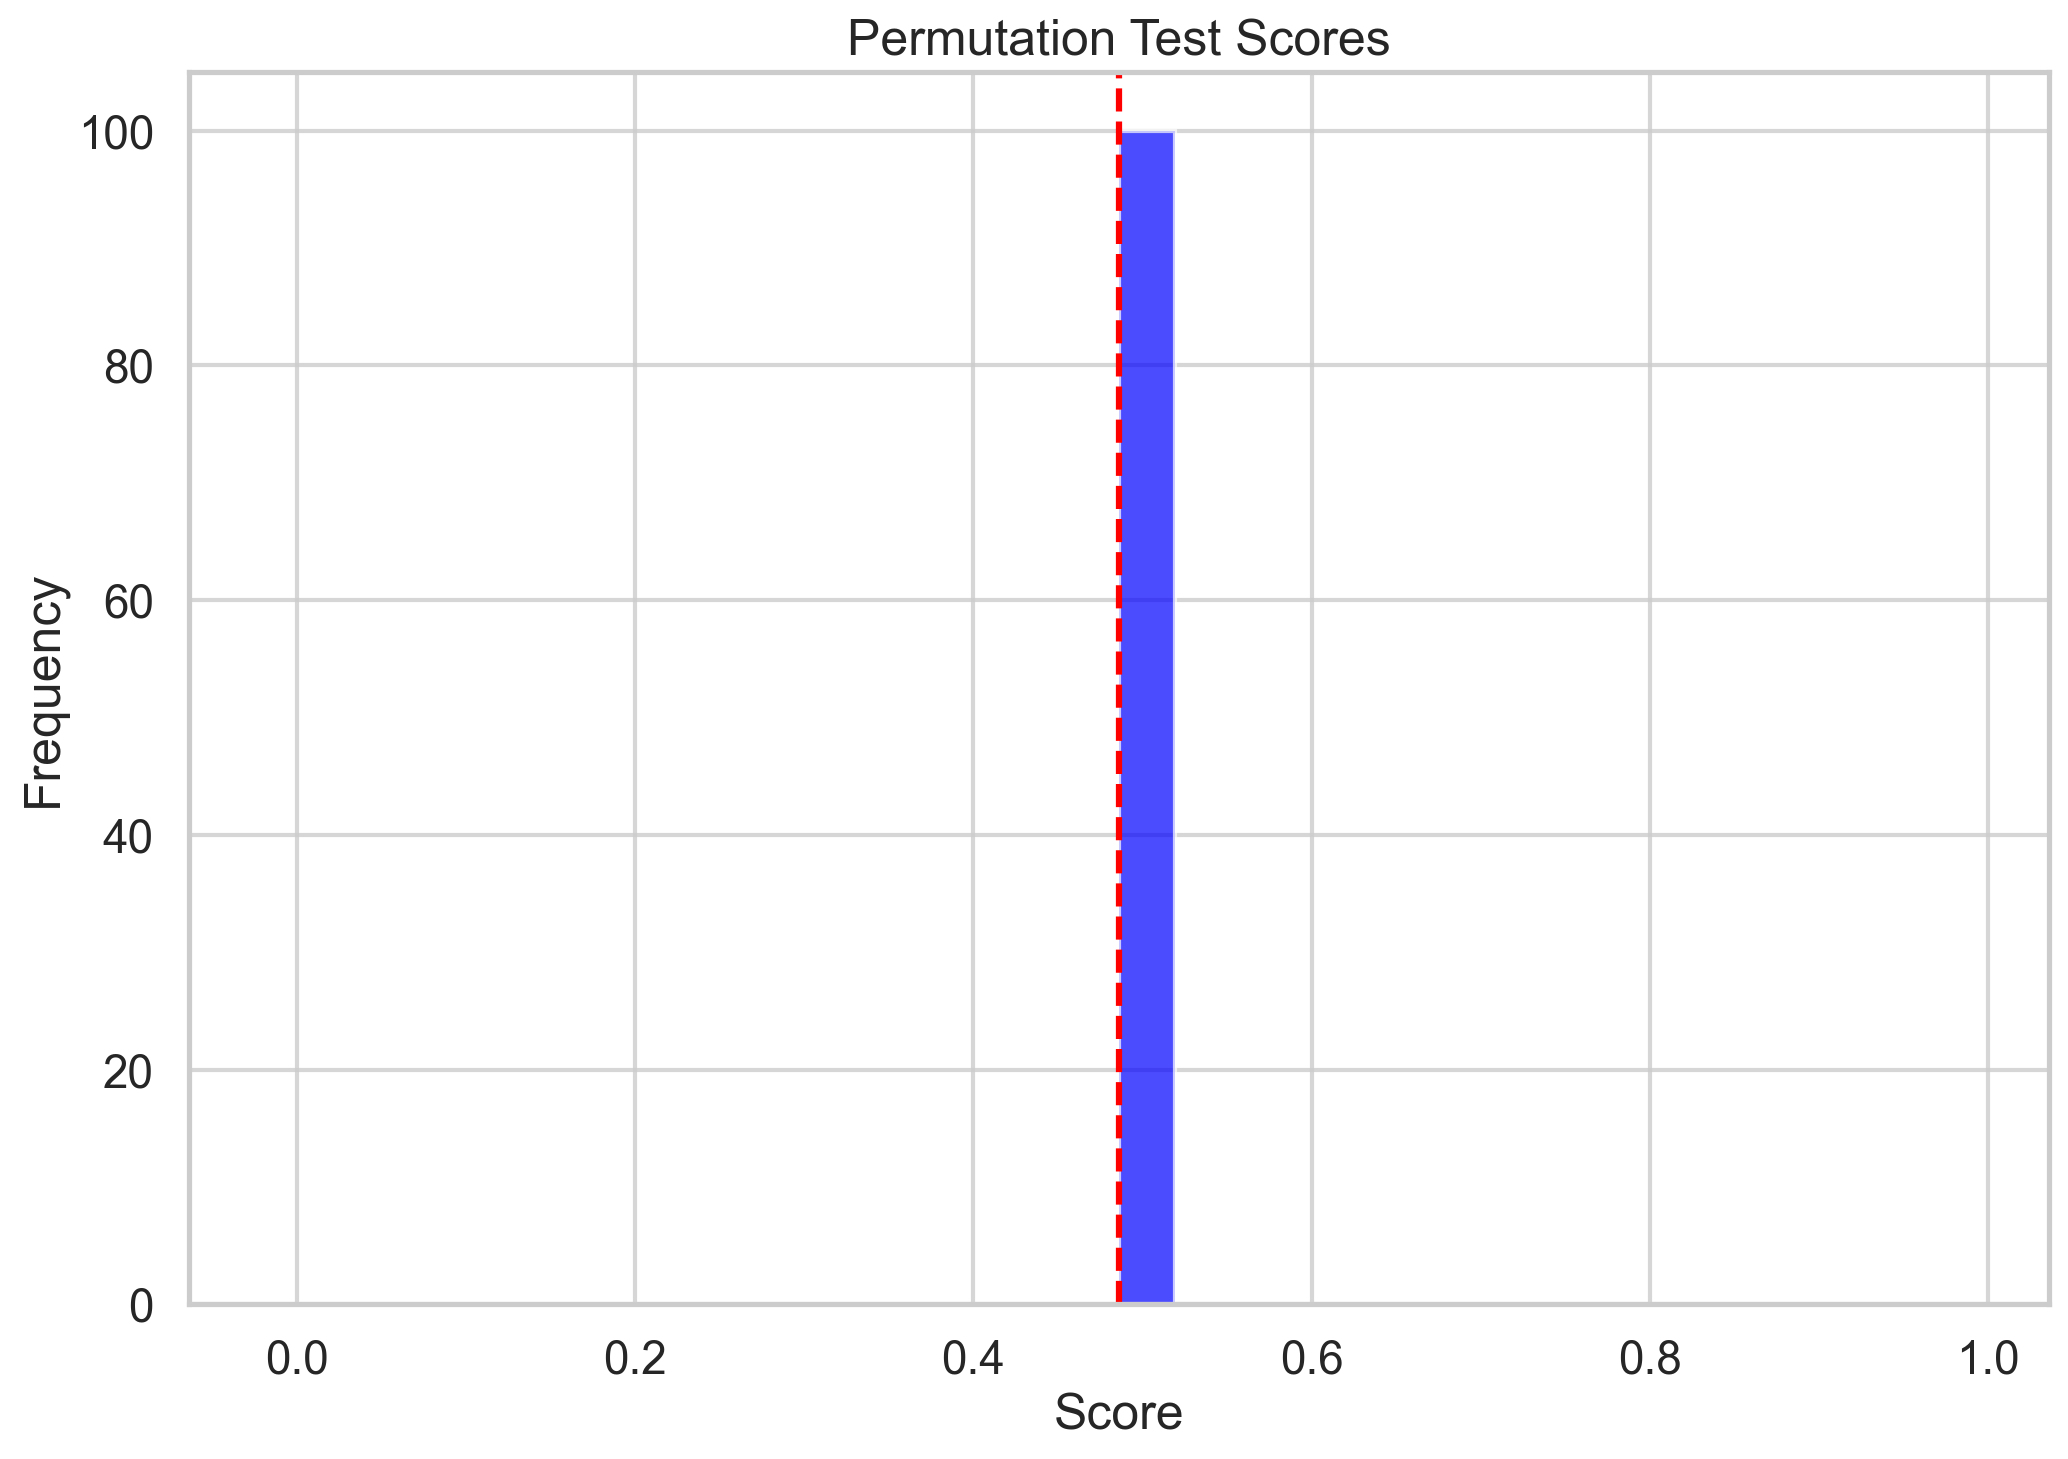

In [62]:
import matplotlib.pyplot as plt

plt.hist(permutation_scores, bins=30, alpha=0.7, color="blue")
plt.axvline(x=score, color="red", linestyle="--")
plt.title("Permutation Test Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

3.7387605832401913
0.7679613271667449


(0.0, 100.0)

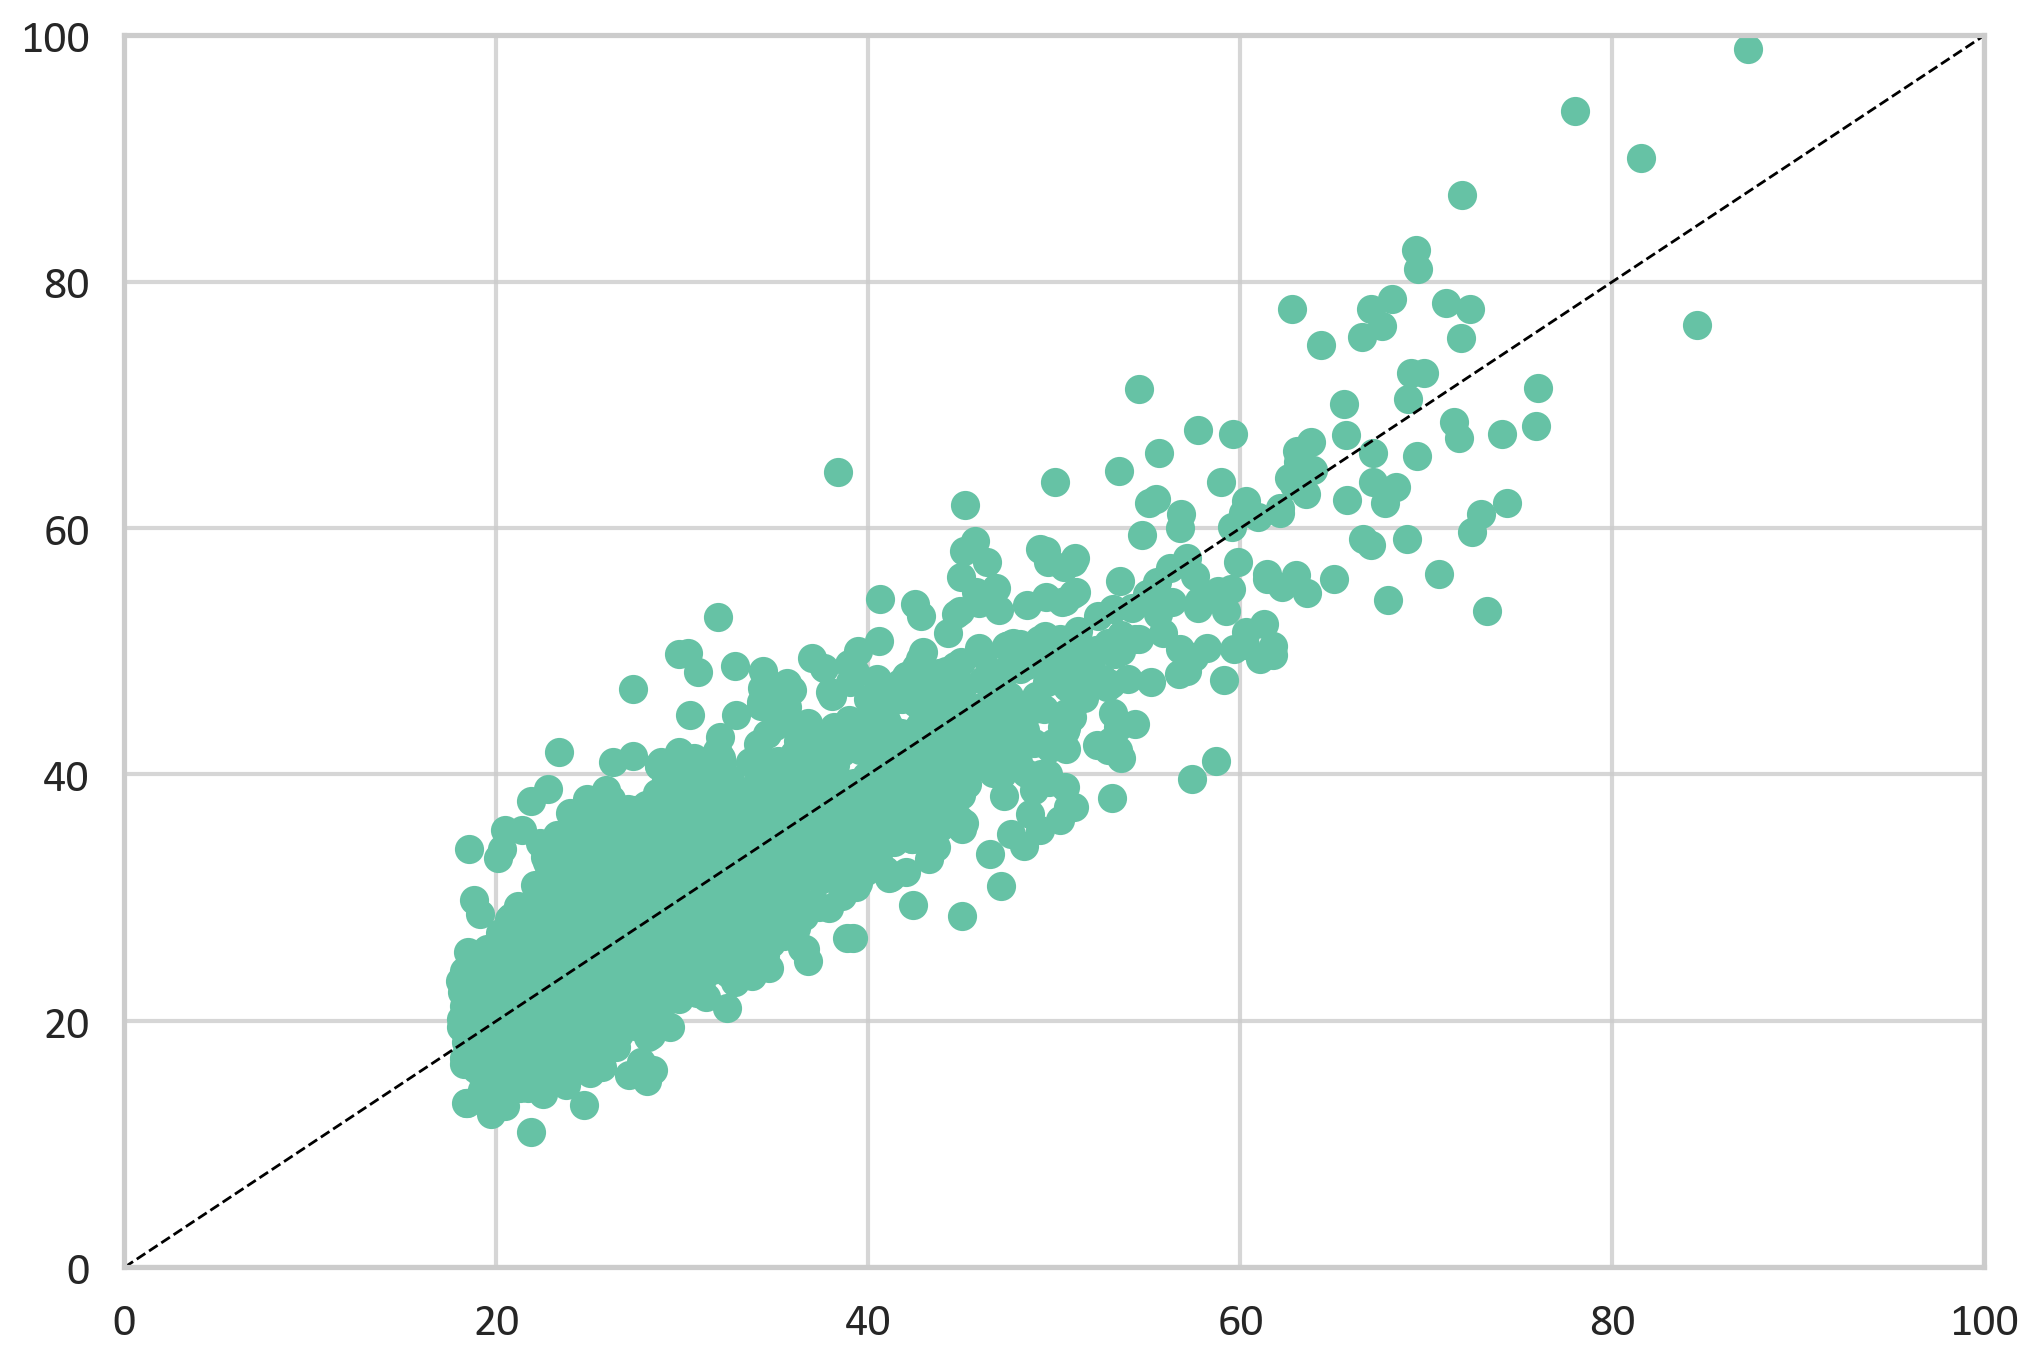

In [28]:
print(mean_absolute_error(y, y_pred, sample_weight=w if use_weights else None))
print(r2_score(y, y_pred, sample_weight=w if use_weights else None))
plt.scatter(y, y_pred)
plt.plot([0, 100], [0, 100], color="black", linestyle="--", linewidth=1)
plt.xlim(0, 100)
plt.ylim(0, 100)

In [29]:
from scipy.stats import spearmanr

spearmanr(predictions["gm_vol"]["True"], predictions["gm_vol"]["corrected_residuals"])

SignificanceResult(statistic=np.float64(-0.05854748762579888), pvalue=np.float64(0.0029138299832473734))

In [30]:
pd.DataFrame(perf_rows).set_index("metric").sort_values("MAE_weighted", ascending=True)

model        R2  \
metric                                                                 
gm_vol   (RobustScaler(), Ridge(alpha=np.float64(117.21...  0.781308   
wm_vol   (RobustScaler(), Ridge(alpha=np.float64(204.33...  0.770990   
ad       (RobustScaler(), Ridge(alpha=np.float64(621.01...  0.786468   
csf_vol  (RobustScaler(), Ridge(alpha=np.float64(356.22...  0.774920   
fa       (RobustScaler(), Ridge(alpha=np.float64(356.22...  0.781293   
adc      (RobustScaler(), Ridge(alpha=np.float64(621.01...  0.783252   
rd       (RobustScaler(), Ridge(alpha=np.float64(356.22...  0.767961   

         R2_weighted       MAE  MAE_weighted      RMSE  RMSE_weighted  
metric                                                                 
gm_vol      0.918399  3.769808      4.203820  4.759454       5.336272  
wm_vol      0.919067  3.867013      4.263403  4.870430       5.314371  
ad          0.899977  3.542186      4.475823  4.702964       5.907979  
csf_vol     0.888088  3.639963      4.651363  4.828459       6.249258  
fa          0.889026  3.686842      4.664813  4.759615       6.223012  
adc         0.889069  3.588037      4.796462  4.738250       6.221799  
rd          0.877955  3.738761      5.003486  4.902531       6.526040

In [31]:
# ### ----------- Concatenate all metrics into one model ----------- ###
# from sklearn.pipeline import make_pipeline

# X_concat = np.hstack([X_dict[m] for m in metrics])  # already row-aligned
# # add covariates
# covariates = pd.concat([cov[cov_names[m]] for m in metrics], axis=1)
# # drop duplicate columns
# covariates = covariates.loc[:, ~covariates.columns.duplicated()].to_numpy()
# X_concat = np.hstack([X_concat, covariates])

# pipe = Pipeline(
#     [
#         ("scaler", scaler),
#         ("estimator", estimator),
#     ]
# )
# y_pred, original_residuals, corrected_residuals = cross_val_predict_with_bias_correction(
#     model=pipe,
#     X=X_concat,
#     y_chronological=y,
#     w=w,
#     cv=outer_cv,
#     use_weights=use_weights,
#     post_hoc_degree=post_hoc_degree,
#     # residual_orthog_degree=post_hoc_degree,
# )

# # if do_post_hoc_correction:
# #     resid = y - y_pred
# #     z = np.polyfit(y, resid, 2)
# #     p = np.poly1d(z)
# #     y_pred = y_pred + p(y)
# # # Save predictions
# predictions_df = cov.copy()
# predictions_df["True"] = y
# predictions_df["Predicted"] = y_pred
# predictions_df["raw_residuals"] = original_residuals
# predictions_df["corrected_residuals"] = corrected_residuals
# predictions["concatenated"] = predictions_df
# perf_rows.append(
#     dict(
#         metric="concatenated",
#         R2=r2_score(y, y_pred),
#         R2_weighted=r2_score(y, y_pred, sample_weight=w),
#         MAE=mean_absolute_error(y, y_pred),
#         MAE_weighted=mean_absolute_error(y, y_pred, sample_weight=w),
#         RMSE=root_mean_squared_error(y, y_pred),
#         RMSE_weighted=root_mean_squared_error(y, y_pred, sample_weight=w),
#     )
# )

In [32]:
# polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

# ---------------------------------------------------------------------
# 2. Parcel-wise base-learner loop
# ---------------------------------------------------------------------
stacked_models = parcels.copy()

stacked_estimators = {}
predictions["base_stacked"] = {}

alphas = np.logspace(-3, 4, 30)  # ridge grid
for i, row in parcels.iterrows():  # i == parcel index (0..453)
    # ------------- build design matrix for parcel i -----------------
    # X_roi : (n_subjects , 5 metrics)
    # X_cov = cov[cov_names["gm_vol"]].to_numpy()
    X_roi = np.hstack([X_dict[m][:, [i]] for m in metrics])
    # X_roi = np.hstack([X_roi, X_cov])  # add covariates
    grid.fit(X_roi, y, estimator__sample_weight=w if use_weights else None)  # fit the model
    model = grid.best_estimator_  # get the best model
    y_pred = cross_val_predict(
        estimator=model,
        X=X_roi,
        y=y,
        cv=outer_cv,
        params={"estimator__sample_weight": w if use_weights else None},
        # correction_func=beheshti_correction if apply_correction else None,
    )
    # y_pred = manual_cross_val_predict(
    #     model=pipe,
    #     X=X_roi,
    #     y=y,
    #     cv=outer_cv,
    #     sample_weight=w if use_weights else None,
    #     # apply_correction=apply_correction,
    #     apply_correction=False,
    # )
    # y_pred = pipe.predict(X_roi, **{"y_chron": y} if apply_correction else {})
    residuals = y_pred - y
    # ---------------- fit model & predict --------------------------
    # y_pred, original_residuals, corrected_residuals = cross_val_predict_with_bias_correction(
    #     model=pipe,
    #     X=X_roi,
    #     y_chronological=y,
    #     w=w,
    #     cv=outer_cv,
    #     use_weights=use_weights,
    #     post_hoc_degree=0,
    #     # residual_orthog_degree=post_hoc_degree,
    # )

    # ---------------- store predictions & metrics -------------------
    pred_df = cov.copy()
    pred_df["True"] = y
    pred_df["Predicted"] = y_pred
    # pred_df["raw_residuals"] = original_residuals
    pred_df["corrected_residuals"] = residuals
    predictions["base_stacked"][i] = pred_df
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    r2_weighted = r2_score(y, y_pred, sample_weight=w)
    mae_weighted = mean_absolute_error(y, y_pred, sample_weight=w)
    rmse_weighted = root_mean_squared_error(y, y_pred, sample_weight=w)

    stacked_models.loc[
        i, ["R2", "MAE", "RMSE", "R2_weighted", "MAE_weighted", "RMSE_weighted"]
    ] = [r2, mae, rmse, r2_weighted, mae_weighted, rmse_weighted]
    stacked_estimators[i] = model
    # if i == 428:
    #     break

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each

<Axes: >

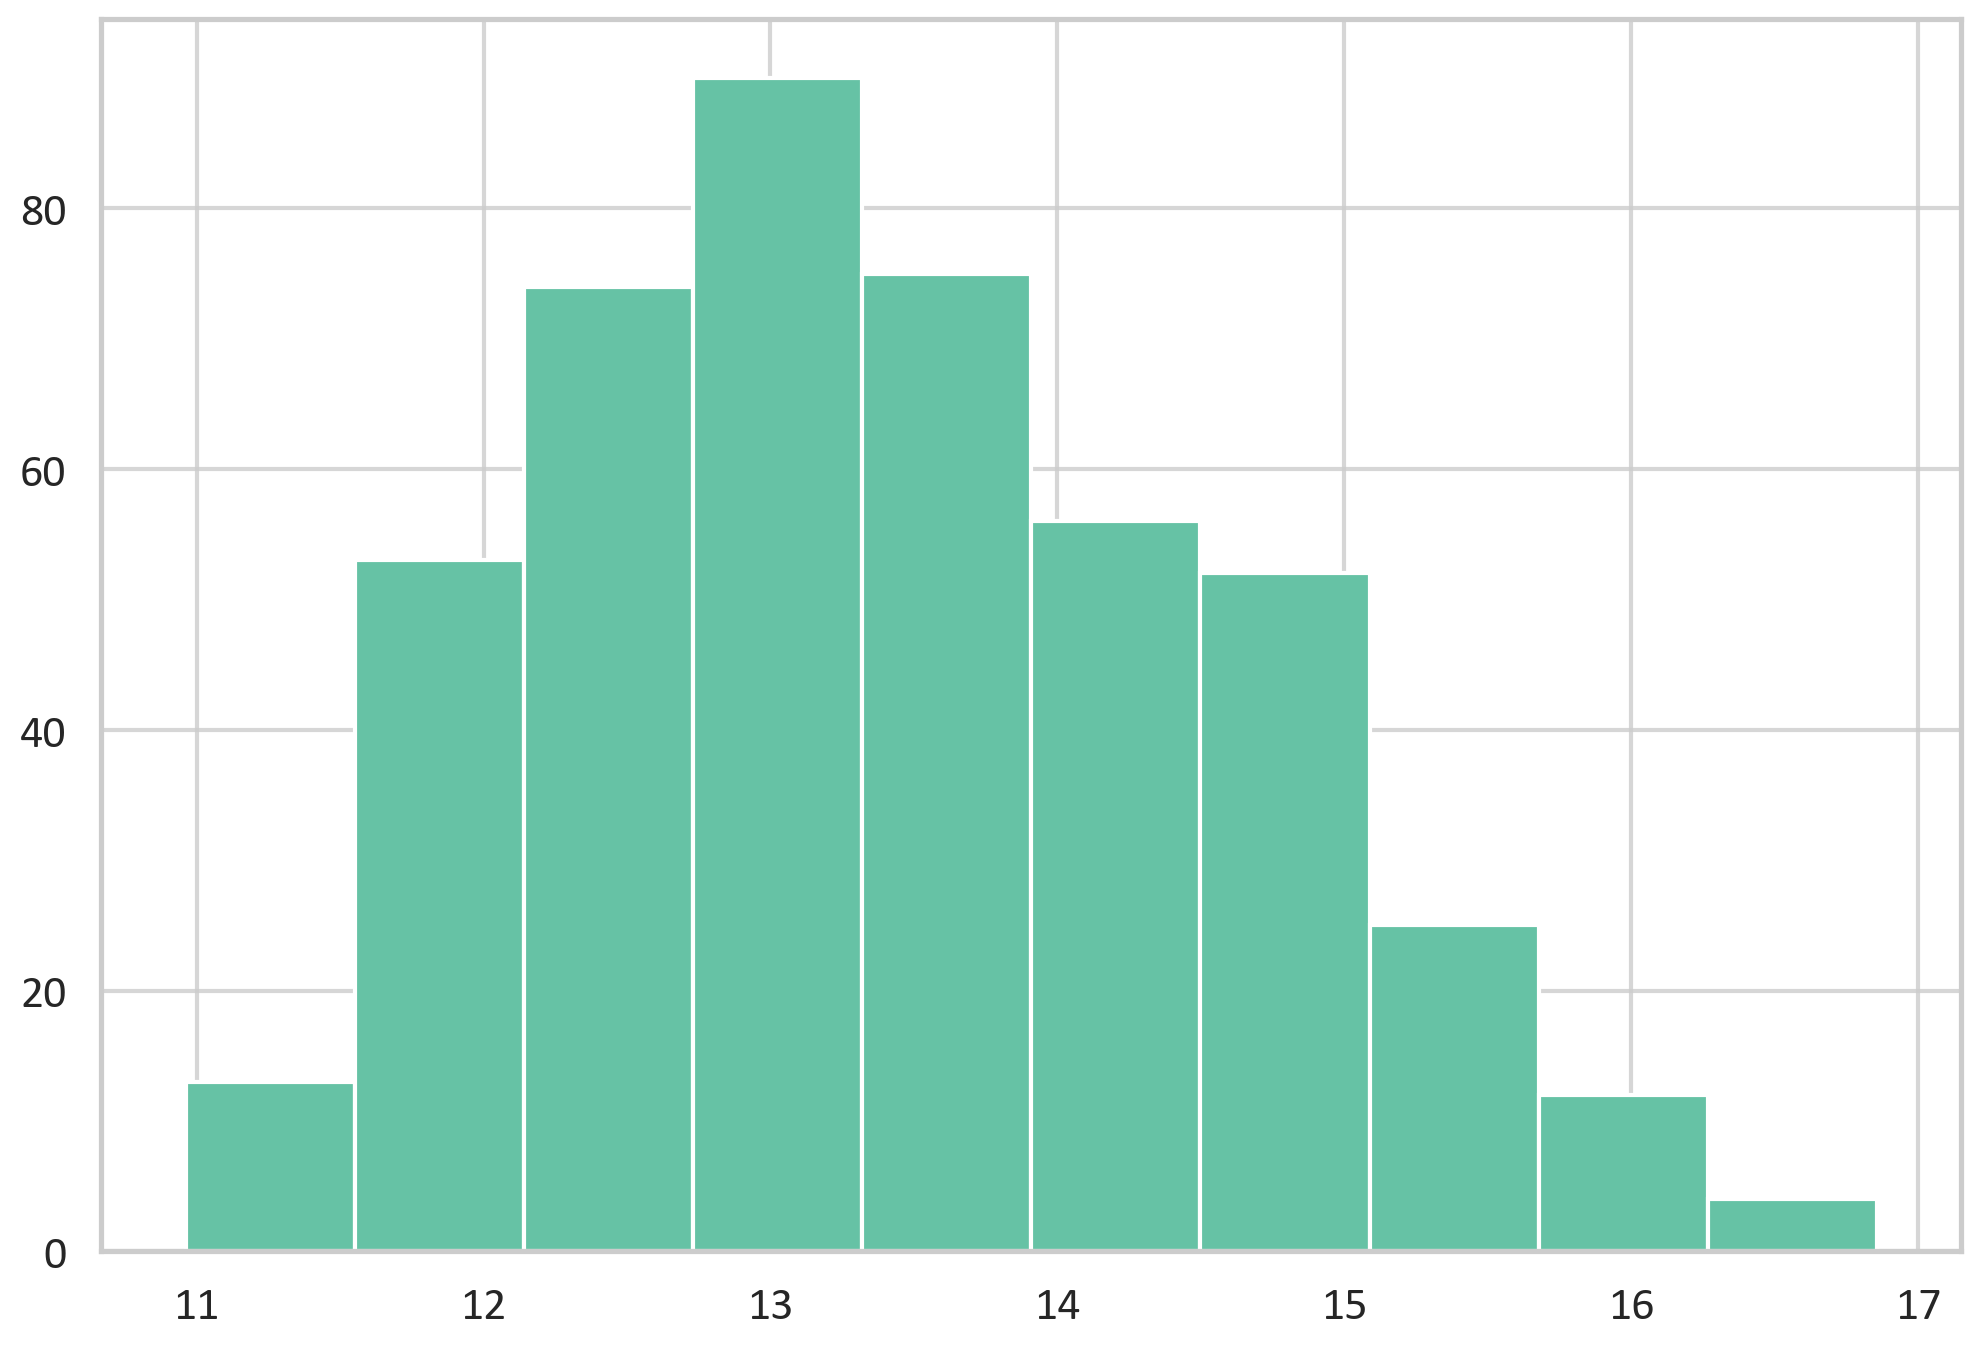

In [33]:
stacked_models["MAE_weighted"].hist()
# plt.scatter(y,y_pred)
# stacked_models.sort_values("MAE_weighted", ascending=True)

In [34]:
stacked_models.sort_values("MAE", ascending=True)

index                            name                     base_name  \
331    332         7Networks_RH_Cont_Par_1         7networks_rh_cont_par   
413    414                       PUT-DA-rh                        PUT-DA   
255    256          7Networks_RH_SomMot_26           7networks_rh_sommot   
359    360       7Networks_RH_Cont_PFCmp_1       7networks_rh_cont_pfcmp   
311    312  7Networks_RH_SalVentAttn_Med_2  7networks_rh_salventattn_med   
..     ...                             ...                           ...   
125    126  7Networks_LH_Limbic_TempPole_8  7networks_lh_limbic_temppole   
401    402                  HIP-head-m2-rh                   HIP-head-m2   
432    433                     HIP-body-lh                      HIP-body   
425    426                          pGP-rh                           pGP   
428    429                  HIP-head-m2-lh                   HIP-head-m2   

                            Label Name                       network  \
331              7Networks_RH_Cont_Par                       control   
413       Putamen, dorso-anterior part                     subcortex   
255                7Networks_RH_SomMot                   somatomotor   
359            7Networks_RH_Cont_PFCmp                       control   
311       7Networks_RH_SalVentAttn_Med  salience / ventral attention   
..                                 ...                           ...   
125       7Networks_LH_Limbic_TempPole                        limbic   
401  Hippocampus head, medial division                     subcortex   
432                   Hippocampus body                     subcortex   
425           Pallidum, posterior part                     subcortex   
428  Hippocampus head, medial division                     subcortex   

                              component hemisphere        R2       MAE  \
331                            parietal          R  0.400143  5.871572   
413                             Putamen          R  0.359520  5.910024   
255                         somatomotor          R  0.383241  5.919657   
359  medial posterior prefrontal cortex          R  0.400070  5.984592   
311                              medial          R  0.386838  5.993613   
..                                  ...        ...       ...       ...   
125                       temporal pole          L  0.053344  7.360249   
401                    Hippocampus head          R  0.063758  7.368146   
432                    Hippocampus body          L  0.072146  7.411592   
425                            Pallidum          R  0.040108  7.446959   
428                    Hippocampus head          L  0.026035  7.484051   

          RMSE  R2_weighted  MAE_weighted  RMSE_weighted  
331   7.882500     0.358398     11.383760      14.963128  
413   8.145037     0.262447     12.174980      16.043019  
255   7.992781     0.345456     11.658046      15.113283  
359   7.882979     0.407703     11.104491      14.376700  
311   7.969443     0.380252     11.377739      14.706088  
..         ...          ...           ...            ...  
125   9.902306    -0.274397     16.429164      21.088318  
401   9.847685    -0.214975     16.229140      20.590798  
432   9.803475    -0.094651     15.693343      19.544624  
425   9.971293    -0.262832     16.489256      20.992406  
428  10.044119    -0.326091     16.856849      21.511772  

[454 rows x 13 columns]

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
)

# ------------------------------------------------------------------
# 1.  Build the meta-feature matrix  (n_subj × n_parcels [+ covariates])
# ------------------------------------------------------------------
# stack parcel OOF columns → shape (454, n_subj) → transpose
X_cov = cov[cov_names["gm_vol"]].to_numpy()
X_stacked = np.vstack(
    [predictions["base_stacked"][i]["Predicted"].to_numpy() for i in predictions["base_stacked"]]
).T  # (n_subj, n_parcels)

# Optionally add covariates (e.g., sex, TIV)
X_stacked = np.hstack([X_stacked, X_cov])  # (n_subj, n_parcels + n_covariates)

# ------------------------------------------------------------------
# 2.  Meta-learner pipeline (standardised ridge with CV on λ)
# ------------------------------------------------------------------
grid.fit(X_stacked, y, estimator__sample_weight=w if use_weights else None)  # fit the model
model = grid.best_estimator_  # get the best model

# y_pred = pipe.predict(X_stacked, **{"y_chron": y} if apply_correction else {})
y_pred = corrected_cross_val_predict(
    estimator=model,
    X=X_stacked,
    y=y,
    cv=outer_cv,
    params={"estimator__sample_weight": w if use_weights else None},
    correction_func=beheshti_correction if apply_correction else None,
)
# y_pred = manual_cross_val_predict(
#     model=pipe,
#     X=X_stacked,
#     y=y,
#     cv=outer_cv,
#     sample_weight=w if use_weights else None,
#     apply_correction=apply_correction,
# )
residuals = y_pred - y
# ------------------------------------------------------------------
# 3.  Out-of-fold meta predictions with fold-wise bias correction
# ------------------------------------------------------------------
# y_pred, original_residuals, corrected_residuals = cross_val_predict_with_bias_correction(
#     model=pipe,
#     X=X_stacked,
#     y_chronological=y,
#     w=w,
#     cv=outer_cv,
#     use_weights=use_weights,
#     post_hoc_degree=post_hoc_degree,
#     # residual_orthog_degree=post_hoc_degree,
# )

# ------------------------------------------------------------------
# 4.  Store predictions and performance
# ------------------------------------------------------------------
pred_df = cov.copy()
pred_df["True"] = y
pred_df["Predicted"] = y_pred
# pred_df["raw_residuals"] = original_residuals
pred_df["corrected_residuals"] = residuals
predictions["stacked"] = pred_df


perf_rows.append(
    dict(
        metric="stacked",
        model=model,
        R2=r2_score(y, y_pred),
        R2_weighted=r2_score(y, y_pred, sample_weight=w),
        MAE=mean_absolute_error(y, y_pred),
        MAE_weighted=mean_absolute_error(y, y_pred, sample_weight=w),
        RMSE=root_mean_squared_error(y, y_pred),
        RMSE_weighted=root_mean_squared_error(y, y_pred, sample_weight=w),
    )
)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [36]:
dict(
    metric="stacked",
    R2=r2_score(y, y_pred),
    R2_weighted=r2_score(y, y_pred, sample_weight=w),
    MAE=mean_absolute_error(y, y_pred),
    MAE_weighted=mean_absolute_error(y, y_pred, sample_weight=w),
    RMSE=root_mean_squared_error(y, y_pred),
    RMSE_weighted=root_mean_squared_error(y, y_pred, sample_weight=w),
)

{'metric': 'stacked',
 'R2': 0.8121722956706615,
 'R2_weighted': 0.913604156555455,
 'MAE': 3.4084029909130016,
 'MAE_weighted': 4.271852474560427,
 'RMSE': 4.410827035029775,
 'RMSE_weighted': 5.490803893195179}

In [37]:
m = "MAE"
perf_df = pd.DataFrame(perf_rows).set_index("metric").sort_values(m, ascending=True)

In [38]:
perf_df["is_best"] = perf_df[m] == perf_df[m].min()
# set is_best == False to gray and True to green (use RGB colors)
perf_df["color"] = perf_df["is_best"].map({True: COL_WEIGHTED, False: COL_RAW})

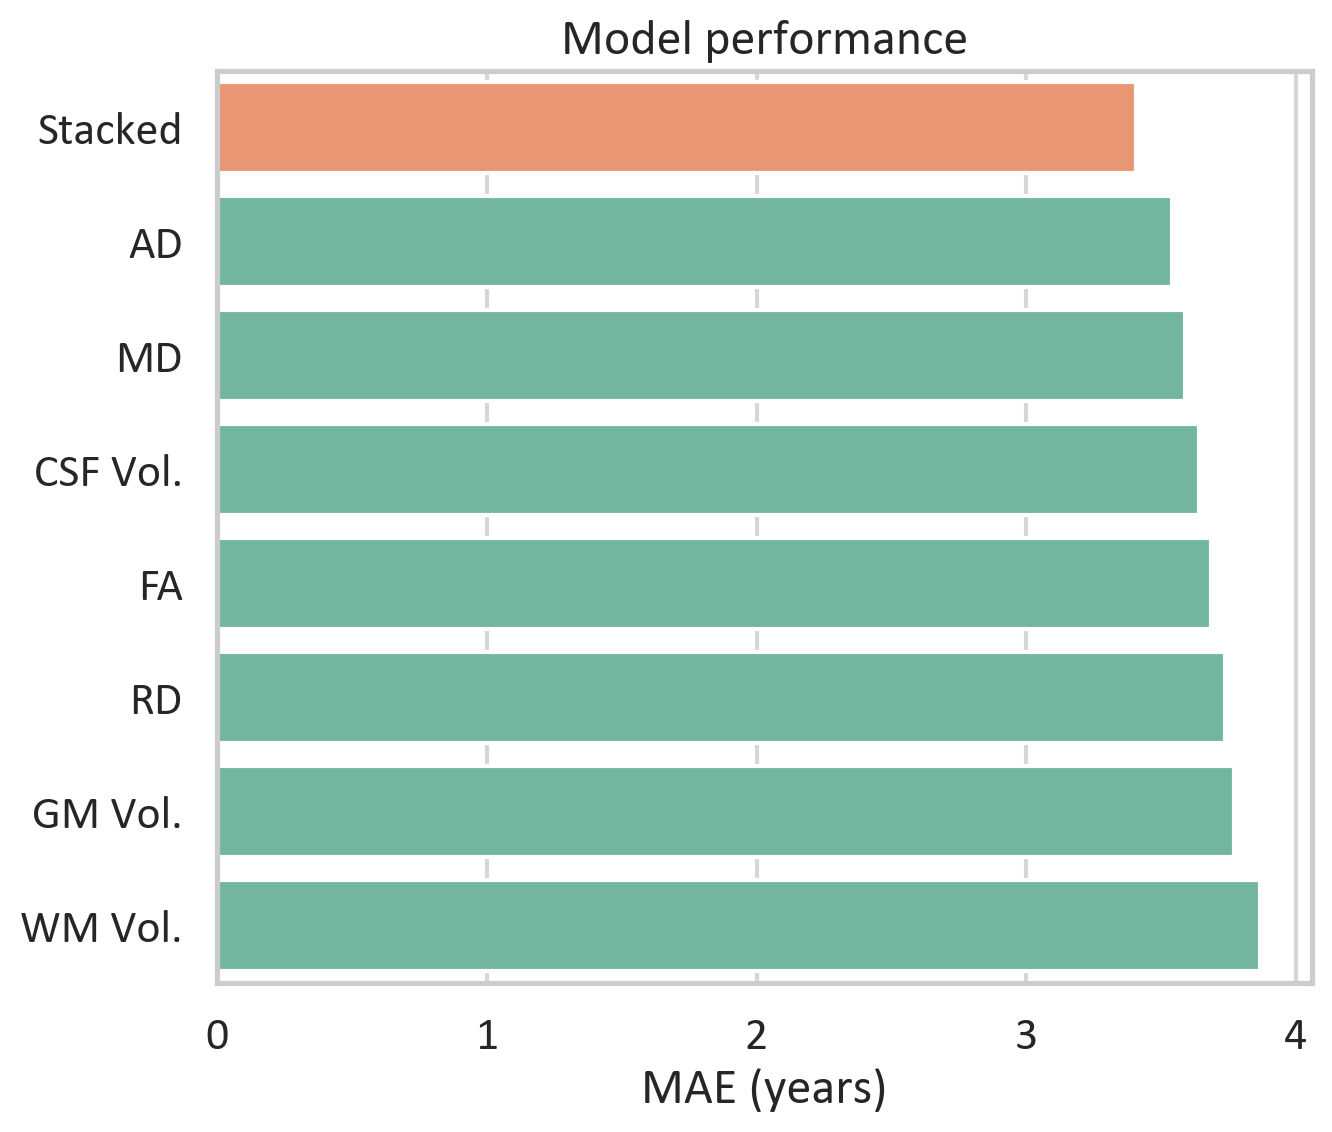

In [39]:
# -----------------------------------------------------------
# 2.  barplot with 95 % BCa bootstrap CIs on R²
# -----------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

ticks_mapping = {
    "gm_vol": "GM Vol.",
    "wm_vol": "WM Vol.",
    "csf_vol": "CSF Vol.",
    "rd": "RD",
    "fa": "FA",
    "ad": "AD",
    "adc": "MD",
    "stacked": "Stacked",
}

fig, ax = plt.subplots(figsize=(7, 6))
sns.barplot(
    y="metric", x=m, data=perf_df.reset_index(), ax=ax, orient="h", hue="is_best", legend=False
)
# ax.errorbar(
#     x=np.arange(len(perf_df)),
#     y=perf_df["RMSE"],
#     # yerr=[perf_df["R2"] - ci_lo, ci_hi - perf_df["R2"]],
#     fmt="none",

#     capsize=4,
#     color="k",
#     lw=1,
# )
# change the y-ticks to the metric names
ax.set_yticks(np.arange(len(perf_df)))
ax.set_yticklabels([ticks_mapping.get(m, m) for m in perf_df.index])
# ax.set_ylabel("$R^{2}$  (10× CV, bias-corrected)")
ax.set_xlabel("MAE (years)")
ax.set_ylabel("")
ax.set_title("Model performance")
# ax.set_xticks(np.arange(0, 1.1, 0.1))
# ax.set_ylim(0.8, perf_df["R2"].max() * 1.15)
plt.tight_layout()
# ax.set_xlim(3,6)
savefig_nice(
    fig,
    OUTPUT_DIR / "model_performance.png",
    tight=True,
    dpi=300,
)
# plt.show()

In [40]:
mpl.rcParams.update(
    {
        # ── Canvas size & resolution ───────────────────────────────────────────
        # Default figure size: 12×8 inches  →  4800×3200 px when exported at 400 dpi
        "figure.figsize": (12, 8),
        "figure.dpi": 200,  # crisp in-notebook / retina preview
        "savefig.dpi": 400,  # print-quality PNG/PDF
        # ── Fonts ──────────────────────────────────────────────────────────────
        "font.family": "calibri",
        "font.sans-serif": ["Roboto", "DejaVu Sans", "Arial"],
        "axes.titlesize": 24,
        # "axes.titleweight": "bold",
        "axes.labelsize": 24,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 20,
        # ── Axis & spine aesthetics ────────────────────────────────────────────
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.spines.left": True,
        "axes.spines.bottom": True,
        "axes.linewidth": 1,
        "axes.grid": True,
        "grid.color": "#E6E6E6",
        "grid.linewidth": 0.4,
        "grid.alpha": 0.8,
        # ── Colour cycle (colour-blind-safe) ───────────────────────────────────
        "axes.prop_cycle": mpl.cycler(color=sns.color_palette("Set2")),
        # ── Figure background ─────────────────────────────────────────────────
        "figure.facecolor": "white",
    }
)

# Seaborn theme inherits the rcParams above
sns.set_theme(context="talk", style="whitegrid", palette="Set2")


# 2.  Seaborn theme (inherits Matplotlib rcParams)
sns.set_theme(
    context="talk",  # slightly larger fonts for presentations / papers
    style="whitegrid",  # grid only on y-axis (good for histograms)
    palette="Set2",  # matches the rcParams colour cycle
)

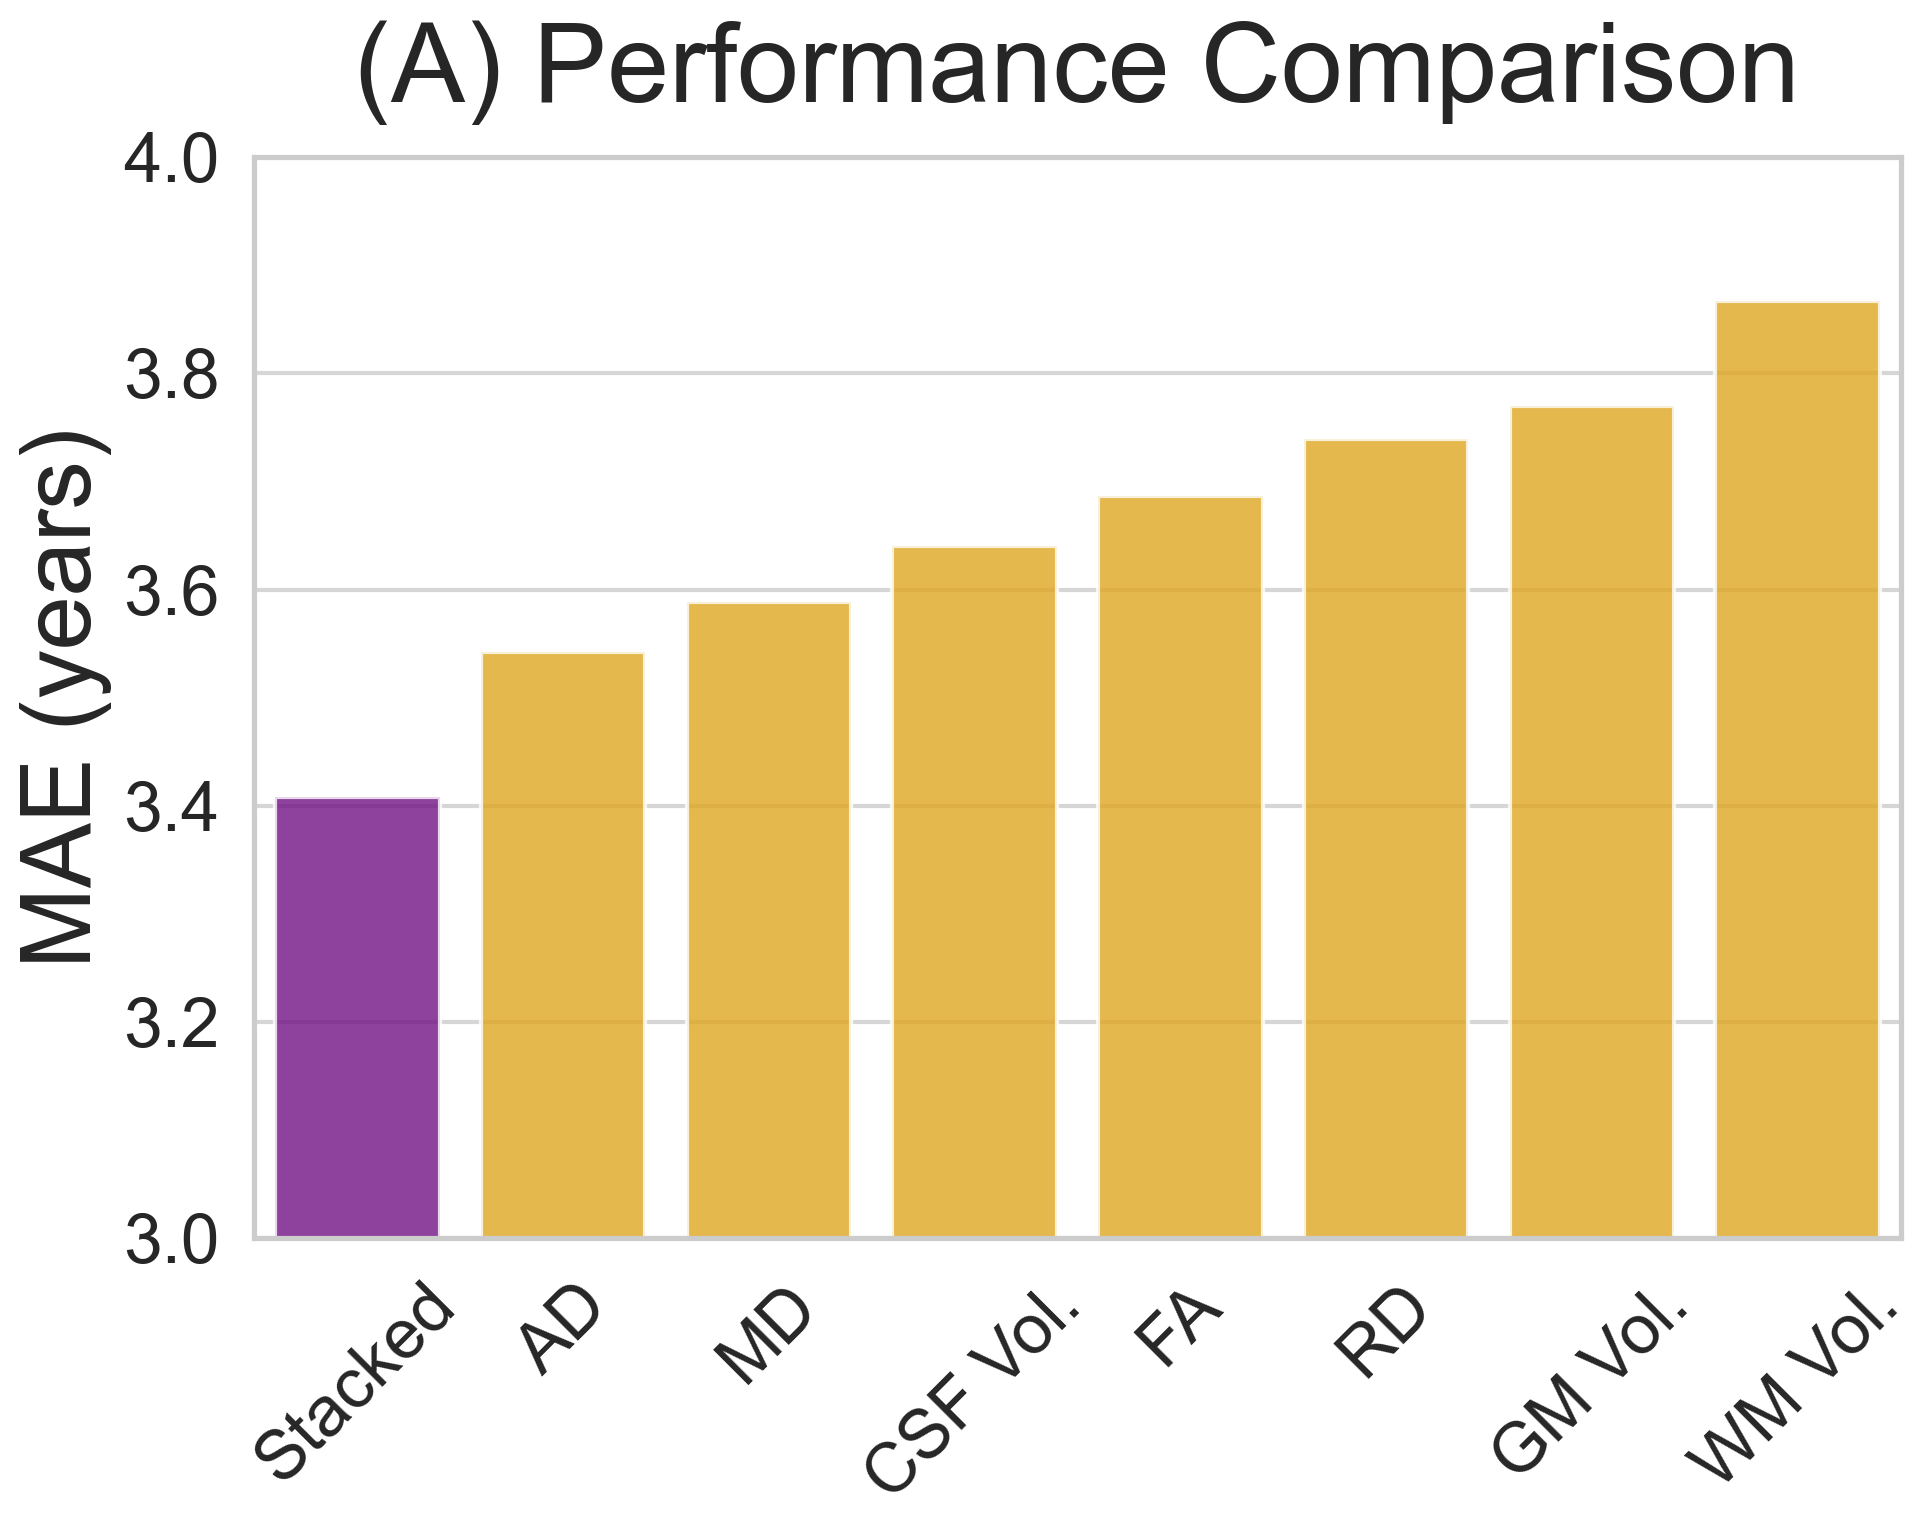

In [54]:
# -----------------------------------------------------------
# 2.  barplot with 95 % BCa bootstrap CIs on R²
# -----------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

ticks_mapping = {
    "gm_vol": "GM Vol.",
    "wm_vol": "WM Vol.",
    "csf_vol": "CSF Vol.",
    "rd": "RD",
    "fa": "FA",
    "ad": "AD",
    "adc": "MD",
    "stacked": "Stacked",
}

fig, ax = plt.subplots(figsize=(10, 8))
mpl.rcParams.update({"axes.labelsize": 35, "ytick.labelsize": 25, "xtick.labelsize": 25})

sns.barplot(
    x="metric",
    y=m,
    data=perf_df.reset_index(),
    ax=ax,
    orient="v",
    hue="is_best",
    legend=False,
    alpha=0.8,
    palette=[COL_RAW, COL_WEIGHTED],
)
# ax.errorbar(
#     x=np.arange(len(perf_df)),
#     y=perf_df["RMSE"],
#     # yerr=[perf_df["R2"] - ci_lo, ci_hi - perf_df["R2"]],
#     fmt="none",

#     capsize=4,
#     color="k",
#     lw=1,
# )
# change the y-ticks to the metric names
ax.set_xticks(np.arange(len(perf_df)))
# rotate x-tick labels for better visibility
ax.set_xticklabels([ticks_mapping.get(m, m) for m in perf_df.index], rotation=45)
# ax.set_ylabel("$R^{2}$  (10× CV, bias-corrected)")
ax.set_ylabel("MAE (years)", fontsize=35)
ax.set_xlabel("")
ax.set_title("(A) Performance Comparison", fontsize=40, pad=20)
ax.set_ylim(3, 4)


# ax.set_xticks(np.arange(0, 1.1, 0.1))
# ax.set_ylim(0.8, perf_df["R2"].max() * 1.15)
plt.tight_layout()
# ax.set_xlim(3,6)
savefig_nice(
    fig,
    OUTPUT_DIR / "model_performance_h.png",
    tight=True,
    dpi=300,
)
# # plt.show()

In [42]:
OUTPUT_DIR

PosixPath('/home/galkepler/Projects/neuroaging/figures/fig4')

In [43]:
best_metric = perf_df.index[0]
# best_metric = "stacked"
y = predictions[best_metric]["True"].to_numpy()
y_pred = predictions[best_metric]["Predicted"].to_numpy()
# w = predictions[best_metric]["weight"].to_numpy()
df_vis = (
    predictions[best_metric][["True", "Predicted"]]
    .copy()
    .rename(columns={"True": "age", "Predicted": "predicted"})
)

df_vis["residuals"] = df_vis["predicted"] - df_vis["age"]
# # build a model to predict the residuals
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# import statsmodels.formula.api as smf

# # Fit a linear model to the residuals
# df["residuals"] = residuals
# model = ols("residuals ~ age", data=df).fit()
# # use the model to "fix" the predictions
# df["fixed_predicted"] = df["predicted"] + model.resid

/tmp/ipykernel_729385/1041710208.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/tmp/ipykernel_729385/1041710208.py:56: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


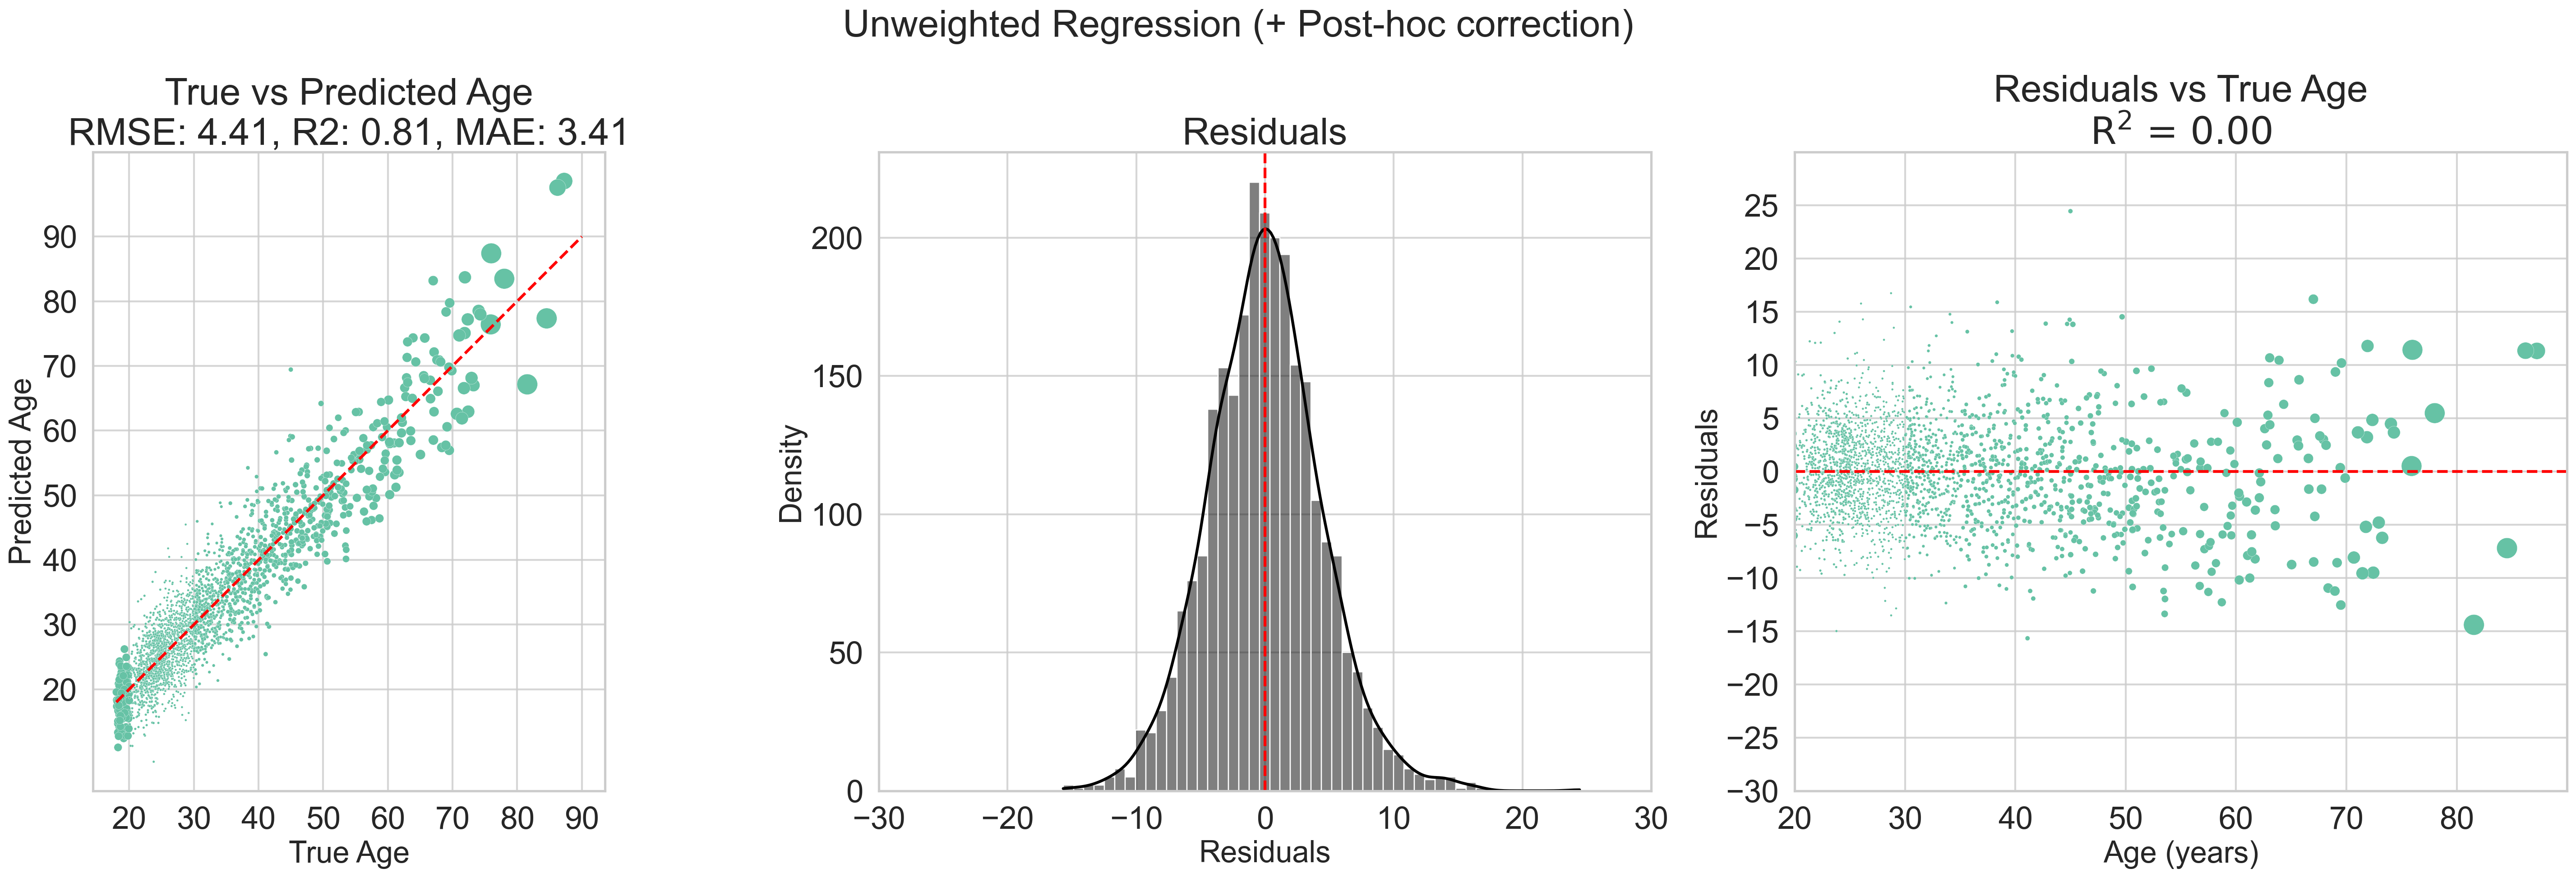

In [44]:
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# plt.style.use("bmh")

do_post_hoc_correction = True
use_weights = False

r2 = r2_score(y, y_pred, sample_weight=w if use_weights else None)
rmse = root_mean_squared_error(y, y_pred, sample_weight=w if use_weights else None)
mae = mean_absolute_error(y, y_pred, sample_weight=w if use_weights else None)

# r2 = r2_score(y, y_pred)
# rmse = root_mean_squared_error(y, y_pred)
# mae = mean_absolute_error(y, y_pred)


title = f"True vs Predicted Age\nRMSE: {rmse:.2f}, R2: {r2:.2f}, MAE: {mae:.2f}"

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
# plot true vs predicted
ax = axes[0]
sns.scatterplot(
    data=df_vis,
    x="age",
    y="predicted",
    ax=ax,
    # cmap="jet",
    # color by weight,
    # hue=w.flatten(),
    palette="viridis",
    s=w * 10,
)
ax.plot([18, 90], [18, 90], "--", c="red")
ax.set_xlabel("True Age", fontsize=24)
ax.set_ylabel("Predicted Age", fontsize=24)
ax.set_title(title, fontsize=30)
ax.set_xticks(range(20, 100, 10))
ax.set_yticks(range(20, 100, 10))
# make axis square
ax.set_aspect("equal", "box")

# plot residuals
ax = axes[1]
sns.histplot(data=df_vis, x="residuals", ax=ax, kde=True, color="black")
ax.set_xlabel("Residuals", fontsize=24)
ax.set_ylabel("Density", fontsize=24)
ax.set_title("Residuals", fontsize=30)
ax.axvline(0, color="red", linestyle="--")
ax.set_xlim(-30, 30)
# plot residuals vs true age

r, p = pearsonr(df_vis["age"], df_vis["residuals"])

ax = axes[2]
sns.scatterplot(
    data=df_vis,
    x="age",
    y="residuals",
    ax=ax,
    # cmap="jet",
    # color by weight,
    # hue=w.flatten(),
    palette="viridis",
    s=w * 10,
)
ax.axhline(0, color="red", linestyle="--")
ax.set_xlabel("Age (years)", fontsize=24)
ax.set_ylabel("Residuals", fontsize=24)
ax.set_title("Residuals vs True Age\n$R^2$ = {:.2f}".format(r**2), fontsize=30)
ax.set_xticks(range(20, 90, 10))
ax.set_yticks(range(-30, 30, 5))
ax.set_xlim(20, 90)
ax.set_ylim(-30, 30)
# make axis square

suptitle = "Weighted Regression" if use_weights else "Unweighted Regression"
if do_post_hoc_correction:
    suptitle += " (+ Post-hoc correction)"
fig.suptitle(suptitle, fontsize=30)

plt.tight_layout()

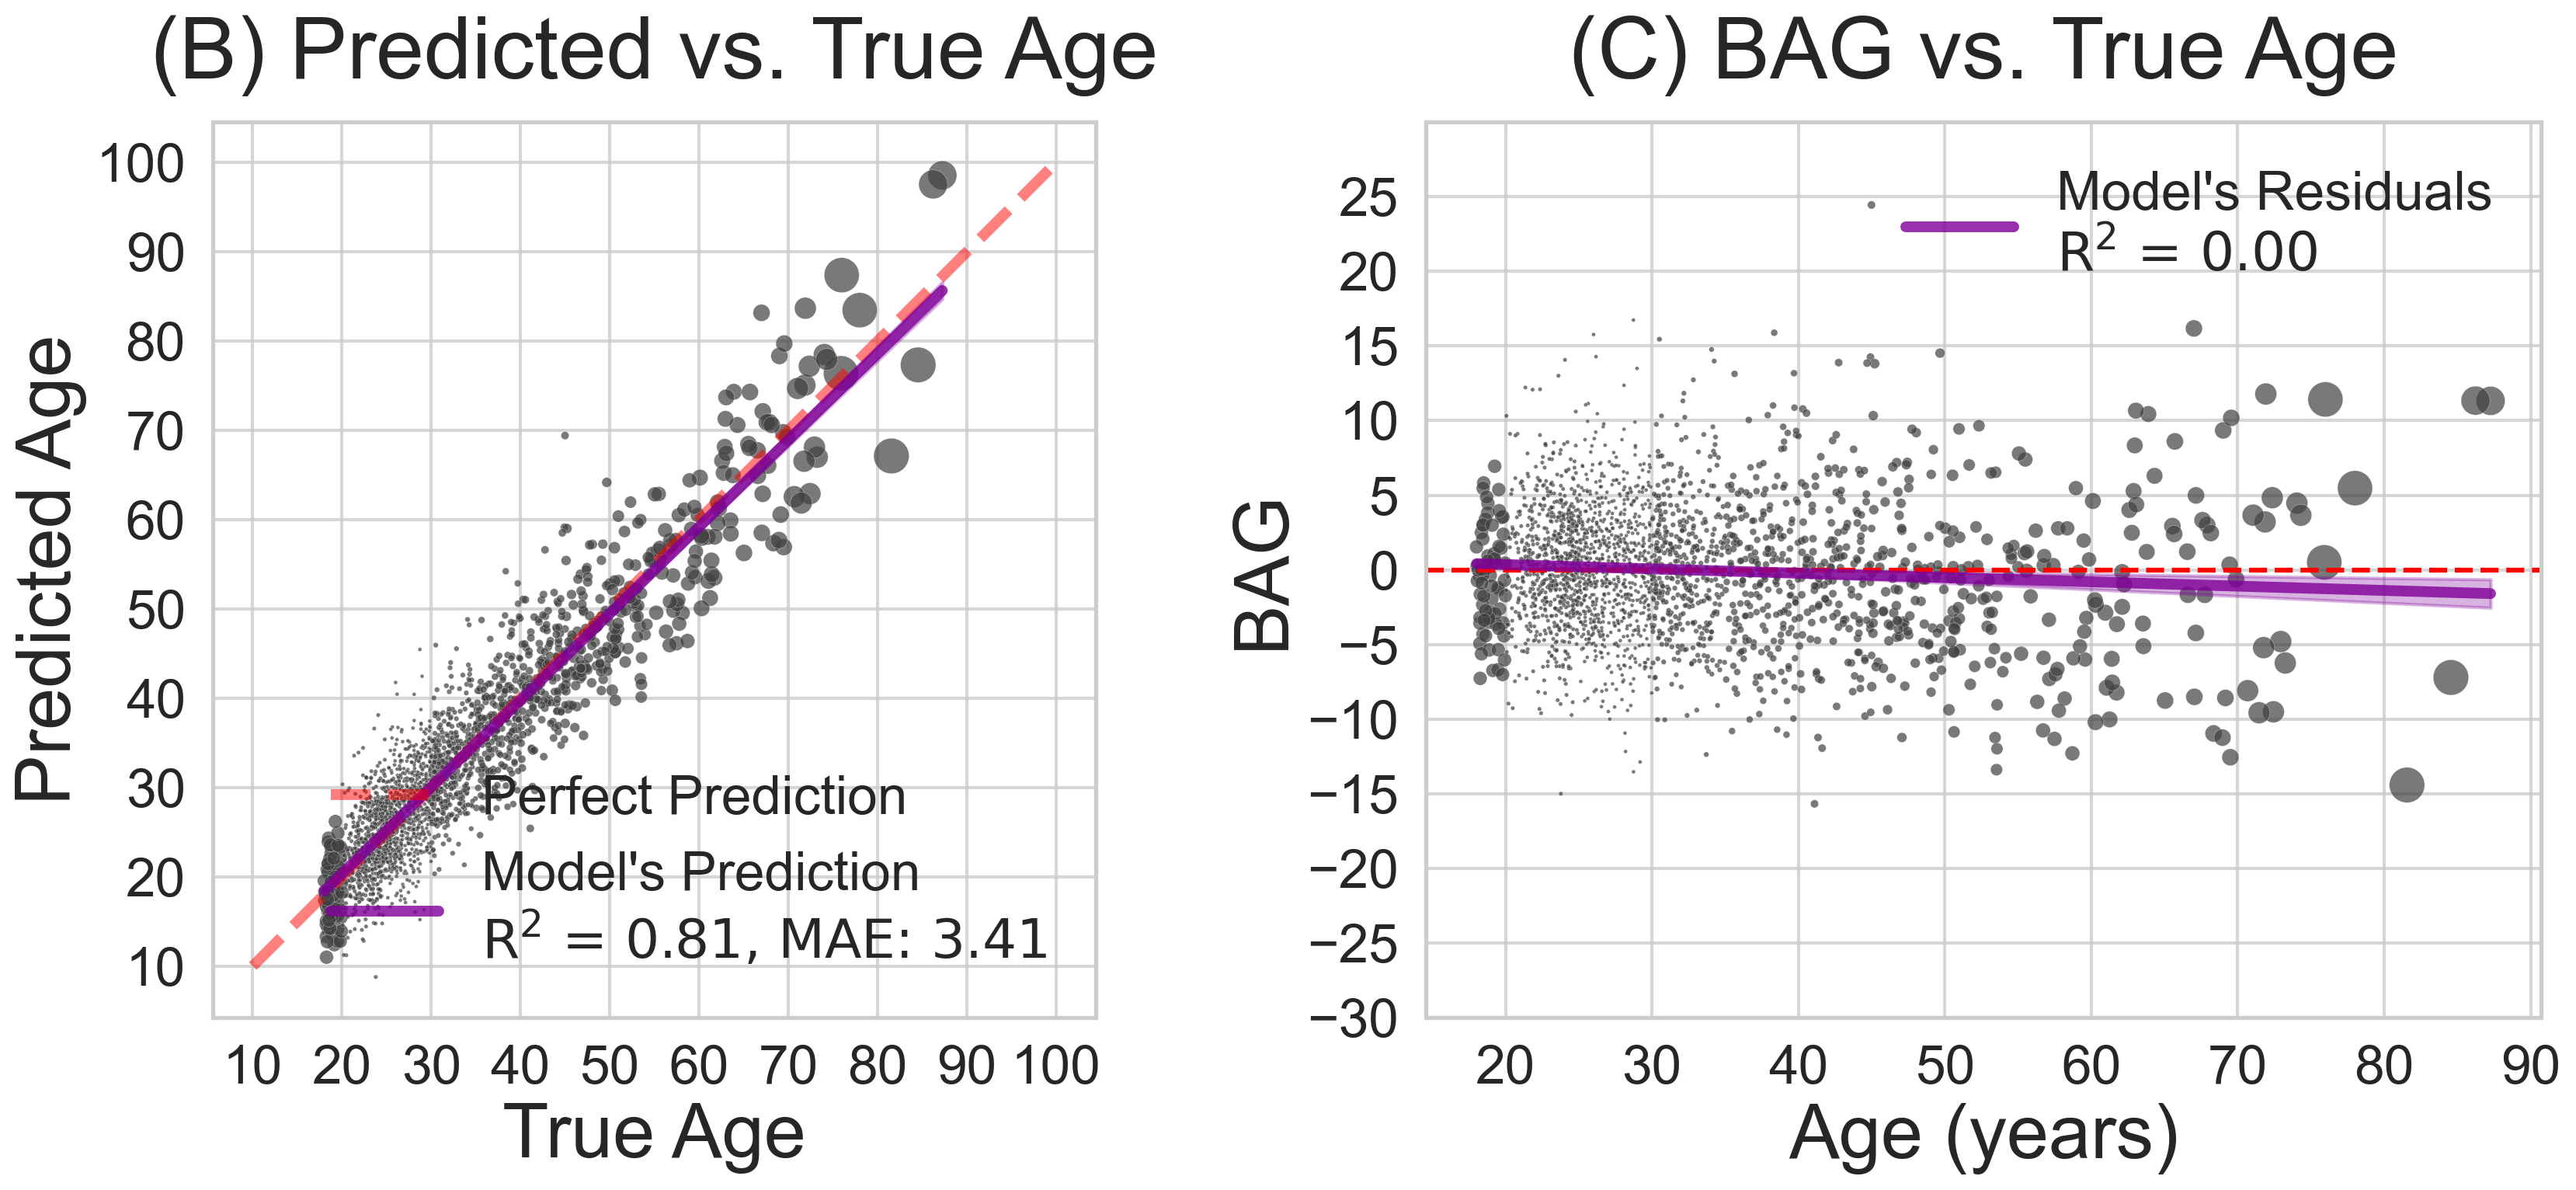

In [45]:
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# plt.style.use("bmh")

do_post_hoc_correction = True
use_weights = False

r2 = r2_score(y, y_pred, sample_weight=w if use_weights else None)
rmse = root_mean_squared_error(y, y_pred, sample_weight=w if use_weights else None)
mae = mean_absolute_error(y, y_pred, sample_weight=w if use_weights else None)

# r2 = r2_score(y, y_pred)
# rmse = root_mean_squared_error(y, y_pred)
# mae = mean_absolute_error(y, y_pred)


# title = f"True vs Predicted Age\nRMSE: {rmse:.2f}, R2: {r2:.2f}, MAE: {mae:.2f}"
title = "(B) Predicted vs. True Age"

fig, axes = plt.subplots(1, 2, figsize=(20, 8), width_ratios=[2, 1])
# make the left ax larger

mpl.rcParams.update({"axes.labelsize": 35, "ytick.labelsize": 25, "xtick.labelsize": 25})

# plot true vs predicted
ax = axes[0]
sns.scatterplot(
    data=df_vis,
    x="age",
    y="predicted",
    ax=ax,
    # cmap="jet",
    # color by weight,
    # hue=w.flatten(),
    color=COL_REF,
    alpha=0.7,
    s=w * 10,
)
ax.plot([10, 100], [10, 100], "--", c="red", lw=5, alpha=0.5, label="Perfect Prediction")
ax.set_xlabel("True Age")
ax.set_ylabel("Predicted Age")
ax.set_title(title, fontsize=40, pad=20)
ax.set_xticks(range(10, 110, 10))
ax.set_yticks(range(10, 110, 10))
# make axis square
ax.set_aspect("equal", "box")

# add regression line between true and predicted age

lin_m = sm.OLS(df_vis["predicted"], sm.add_constant(df_vis["age"])).fit()
x_vals = np.linspace(df_vis["age"].min(), df_vis["age"].max(), 300)[:, np.newaxis]
y_vals = lin_m.predict(sm.add_constant(x_vals))
ax.plot(
    x_vals,
    y_vals,
    lw=5,
    label=f"Model's Prediction\n$R^2$ = {r2:.2f}, MAE: {mae:.2f}",
    color=COL_WEIGHTED,
)

# add confidence intervals to the regression line
predictions = lin_m.get_prediction(sm.add_constant(x_vals))
predictions = predictions.summary_frame(alpha=0.05)
ax.fill_between(
    x_vals.flatten(),
    predictions["mean_ci_lower"],
    predictions["mean_ci_upper"],
    color=COL_WEIGHTED,
    alpha=0.3,
    # label="95% CI",
)

ax.legend(frameon=False, loc="lower right", fontsize=25)
# plot residuals vs true age


ax = axes[1]
sns.scatterplot(
    data=df_vis,
    x="age",
    y="residuals",
    ax=ax,
    # cmap="jet",
    # color by weight,
    # hue=w.flatten(),
    color=COL_REF,
    alpha=0.7,
    s=w * 10,
)
ax.axhline(0, color="red", linestyle="--")
ax.set_xlabel("Age (years)")
ax.set_ylabel("BAG")
ax.set_title("(C) BAG vs. True Age", fontsize=40, pad=20)
ax.set_xticks(range(20, 100, 10))
ax.set_yticks(range(-30, 30, 5))
ax.set_ylim(-30, 30)
# make axis square

# add regression line between residuals and true age
lin_m = sm.OLS(df_vis["residuals"], sm.add_constant(df_vis["age"])).fit()
x_vals = np.linspace(df_vis["age"].min(), df_vis["age"].max(), 300)[:, np.newaxis]
y_vals = lin_m.predict(sm.add_constant(x_vals))
ax.plot(
    x_vals,
    y_vals,
    lw=5,
    label=f"Model's Residuals\n$R^2$ = {lin_m.rsquared:.2f}",
    color=COL_WEIGHTED,
)
# add confidence intervals to the regression line
predictions = lin_m.get_prediction(sm.add_constant(x_vals))
predictions = predictions.summary_frame(alpha=0.05)
ax.fill_between(
    x_vals.flatten(),
    predictions["mean_ci_lower"],
    predictions["mean_ci_upper"],
    color=COL_WEIGHTED,
    alpha=0.3,
    # label="95% CI",
)
ax.legend(frameon=False, loc="upper right", fontsize=25)

fig.subplots_adjust(wspace=0.01)

plt.tight_layout()
savefig_nice(
    fig,
    OUTPUT_DIR / "true_vs_predicted_age.png",
    tight=True,
    dpi=300,
)

In [46]:
# import shap

# feature importance for the best model
best_model = perf_df.loc[best_metric, "model"]
# best_model = model
# X_inspect = best_model.named_steps["scaler"].transform(X_stacked)

# Use the trained estimator
# explainer = shap.LinearExplainer(best_model.named_steps["estimator"], X_inspect)

# Explain on scaled test data
# shap_values = explainer.shap_values(X_inspect)

In [47]:
from sklearn.inspection import permutation_importance


# Calculate permutation importance
result = permutation_importance(
    estimator=best_model,
    X=X_stacked,
    y=y,
    scoring="neg_mean_squared_error",
    n_repeats=100,
    random_state=42,
)

In [48]:
# shap.summary_plot(shap_values, X_inspect)
shap_imp = parcels.copy()
# shap_imp["importance"] = shap_values.mean(axis=0)[: len(parcels)]
# shap_imp["importance_abs"] = np.abs(shap_imp["importance"])
# shap_imp["importance_shap_scaled"] = (
#     shap_imp["importance_abs"] - shap_imp["importance_abs"].min()
# ) / (shap_imp["importance_abs"].max() - shap_imp["importance_abs"].min()
# )
shap_imp["permutation_importance"] = result.importances_mean[: len(parcels)]
shap_imp["permutation_importance_std"] = result.importances_std[: len(parcels)]
shap_imp[shap_imp["permutation_importance"] < 0] = 0  # set negative importances to 0
# min-max scale the permutation importance
shap_imp["permutation_importance_scaled"] = (
    shap_imp["permutation_importance"] - shap_imp["permutation_importance"].min()
) / (shap_imp["permutation_importance"].max() - shap_imp["permutation_importance"].min())

shap_imp.sort_values("permutation_importance_scaled", ascending=False)

index                              name                      base_name  \
441    442                         PUT-VP-lh                         PUT-VP   
437    438                        THA-DAm-lh                        THA-DAm   
413    414                         PUT-DA-rh                         PUT-DA   
438    439                        THA-DAl-lh                        THA-DAl   
435    436                        THA-VPl-lh                        THA-VPl   
..     ...                               ...                            ...   
451    452                       NAc-core-lh                       NAc-core   
389    390  7Networks_RH_Default_PFCdPFCm_12  7networks_rh_default_pfcdpfcm   
420    421                           lAMY-rh                           lAMY   
357      0                                 0                              0   
367      0                                 0                              0   

                                  Label Name    network  \
441           Putamen, ventro-posterior part  subcortex   
437     Thalamus, medial dorso-anterior part  subcortex   
413             Putamen, dorso-anterior part  subcortex   
438    Thalamus, lateral dorso-anterior part  subcortex   
435  Thalamus, lateral ventro-posterior part  subcortex   
..                                       ...        ...   
451                  Nucleus Accumbens, core  subcortex   
389            7Networks_RH_Default_PFCdPFCm    default   
420                Amygdala, lateral nucleus  subcortex   
357                                        0          0   
367                                        0          0   

                                             component hemisphere  \
441                                            Putamen          L   
437                                           Thalamus          L   
413                                            Putamen          R   
438                                           Thalamus          L   
435                                           Thalamus          L   
..                                                 ...        ...   
451                                  Nucleus Accumbens          L   
389  dorsal prefrontal cortex medial prefrontal cortex          R   
420                                           Amygdala          R   
357                                                  0          0   
367                                                  0          0   

     permutation_importance  permutation_importance_std  \
441                1.556890                    0.122148   
437                1.061195                    0.119159   
413                0.861541                    0.101871   
438                0.848011                    0.104632   
435                0.645271                    0.092042   
..                      ...                         ...   
451                0.000016                    0.000154   
389                0.000006                    0.000053   
420                0.000003                    0.000047   
357                0.000000                    0.000000   
367                0.000000                    0.000000   

     permutation_importance_scaled  
441                       1.000000  
437                       0.681612  
413                       0.553373  
438                       0.544682  
435                       0.414462  
..                             ...  
451                       0.000010  
389                       0.000004  
420                       0.000002  
357                       0.000000  
367                       0.000000  

[454 rows x 10 columns]

<Axes: >

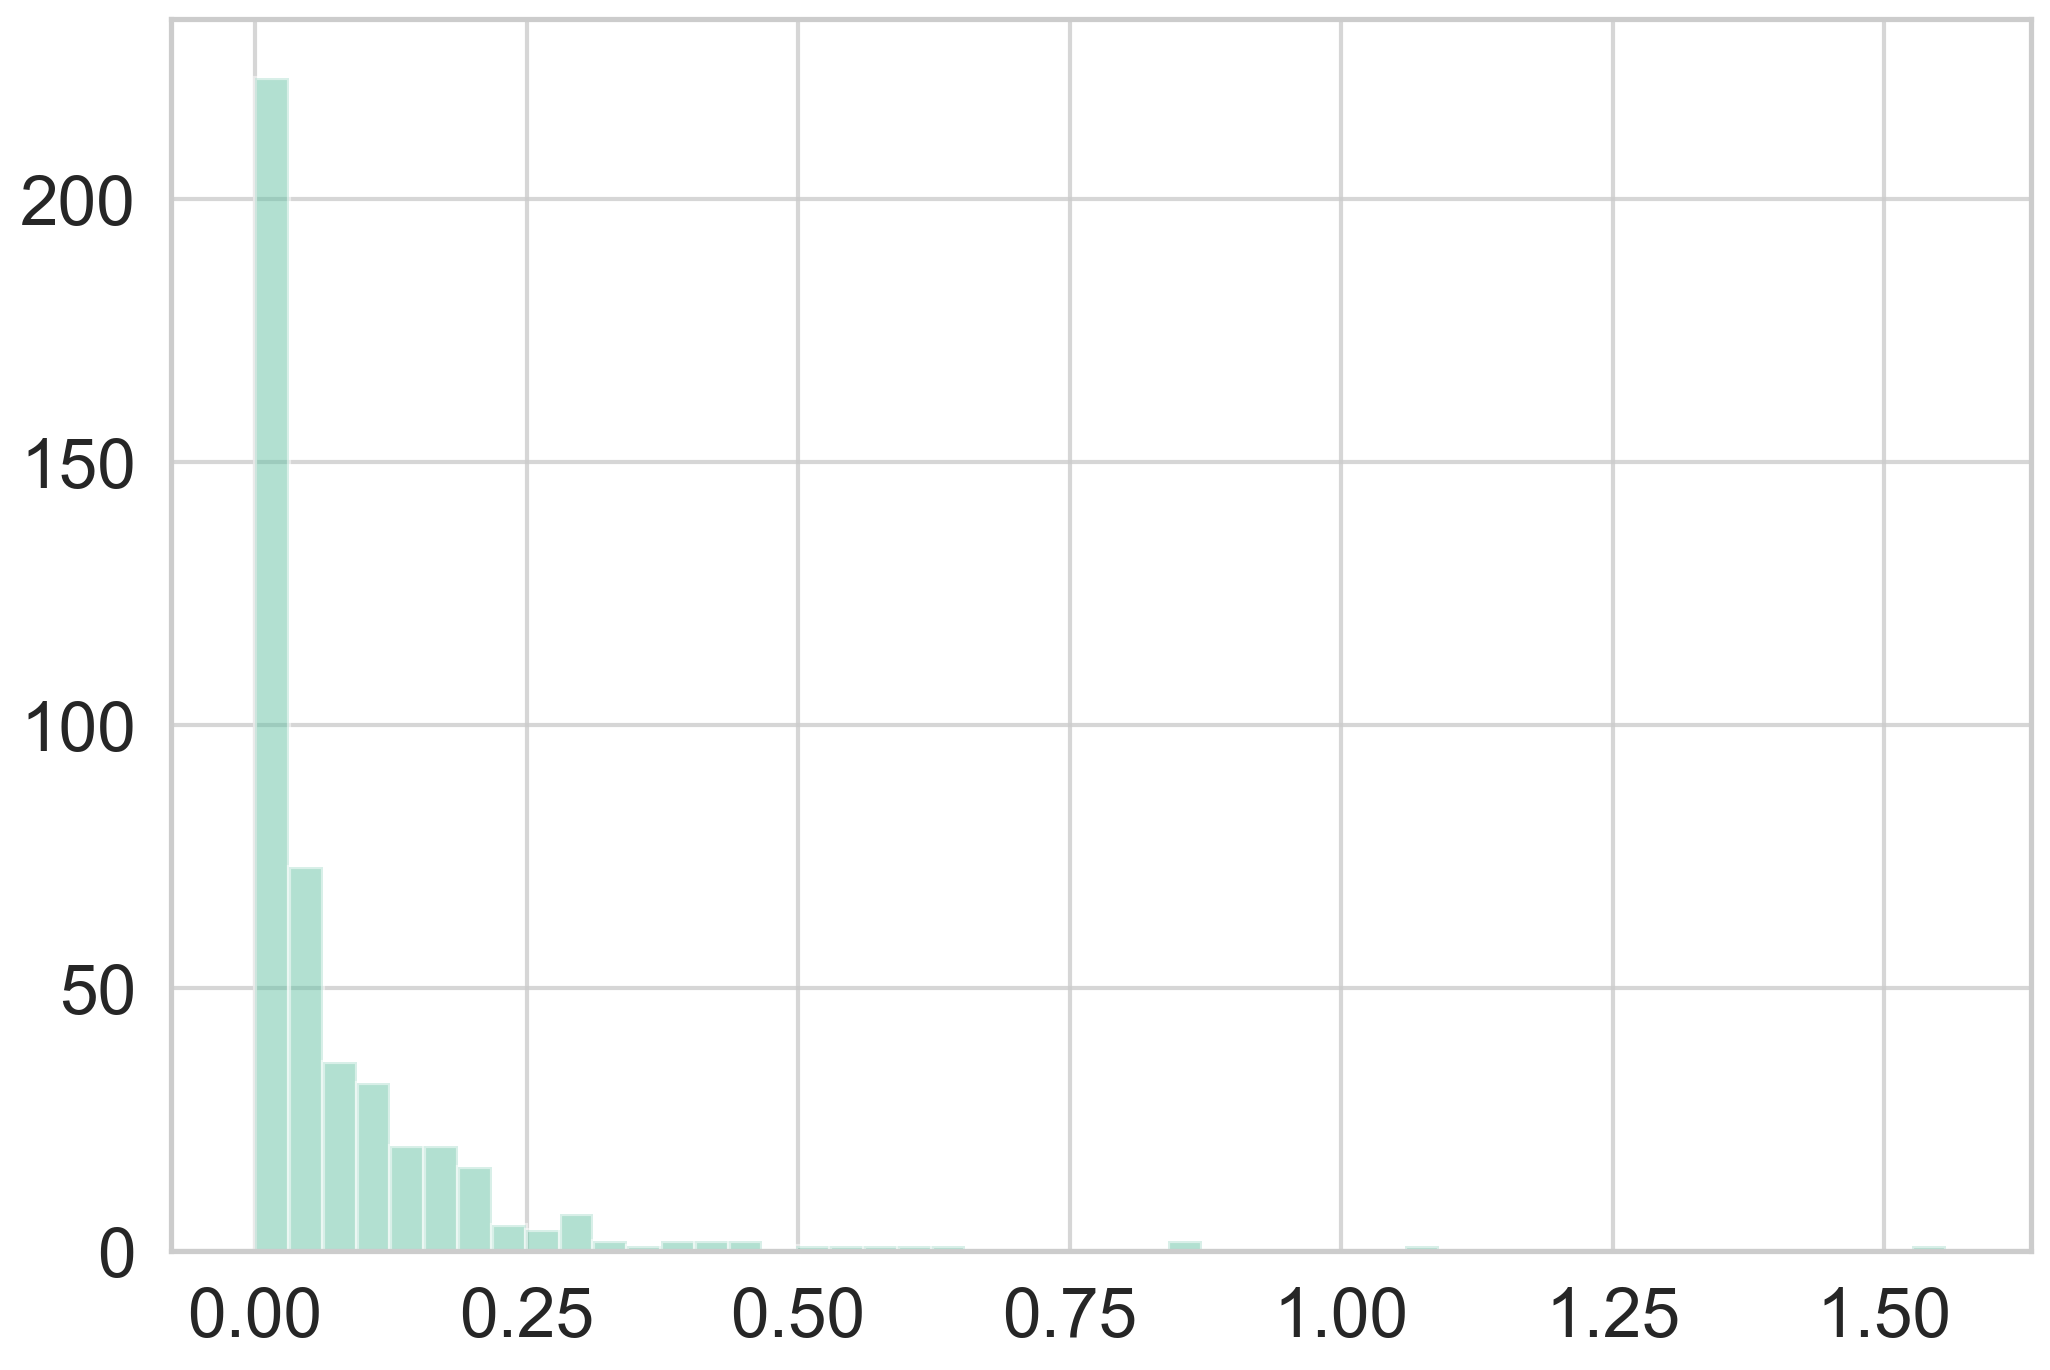

In [49]:
# shap_imp["permutation_importance_scaled"].apply(
#     lambda x: np.log10(x) if x > 0 else 0
# ).hist()
shap_imp["permutation_importance"].hist(bins=50, alpha=0.5, label="SHAP")

In [50]:
shap_imp["permutation_importance"].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

0.25    0.006700
0.50    0.031570
0.75    0.099082
0.90    0.194784
0.95    0.285538
0.99    0.623727
Name: permutation_importance, dtype: float64

In [51]:
import numpy as np
import pandas as pd
import nibabel as nb
from nilearn import surface, datasets
from surfplot import Plot
from matplotlib.colors import TwoSlopeNorm  # nice diverging colours
from neuromaps.datasets import fetch_fslr
from brainspace.datasets import load_parcellation
import nibabel as nib


atlas_img = nib.load(nifti_matlab)

# ---------------------------------------------------------------------
# 2.  FETCH A STANDARD SURFACE  (fsaverage5 = 10k vertices per hemi)
# ---------------------------------------------------------------------
surfaces = fetch_fslr()
lh, rh = surfaces["inflated"]


# ---------------------------------------------------------------------
# 3.  SAMPLE ATLAS VOXELS → SURFACE  (nearest-neighbour so labels stay int)
# ---------------------------------------------------------------------
# add schaefer parcellation (no color bar needed)
lh_parc, rh_parc = load_parcellation("schaefer")

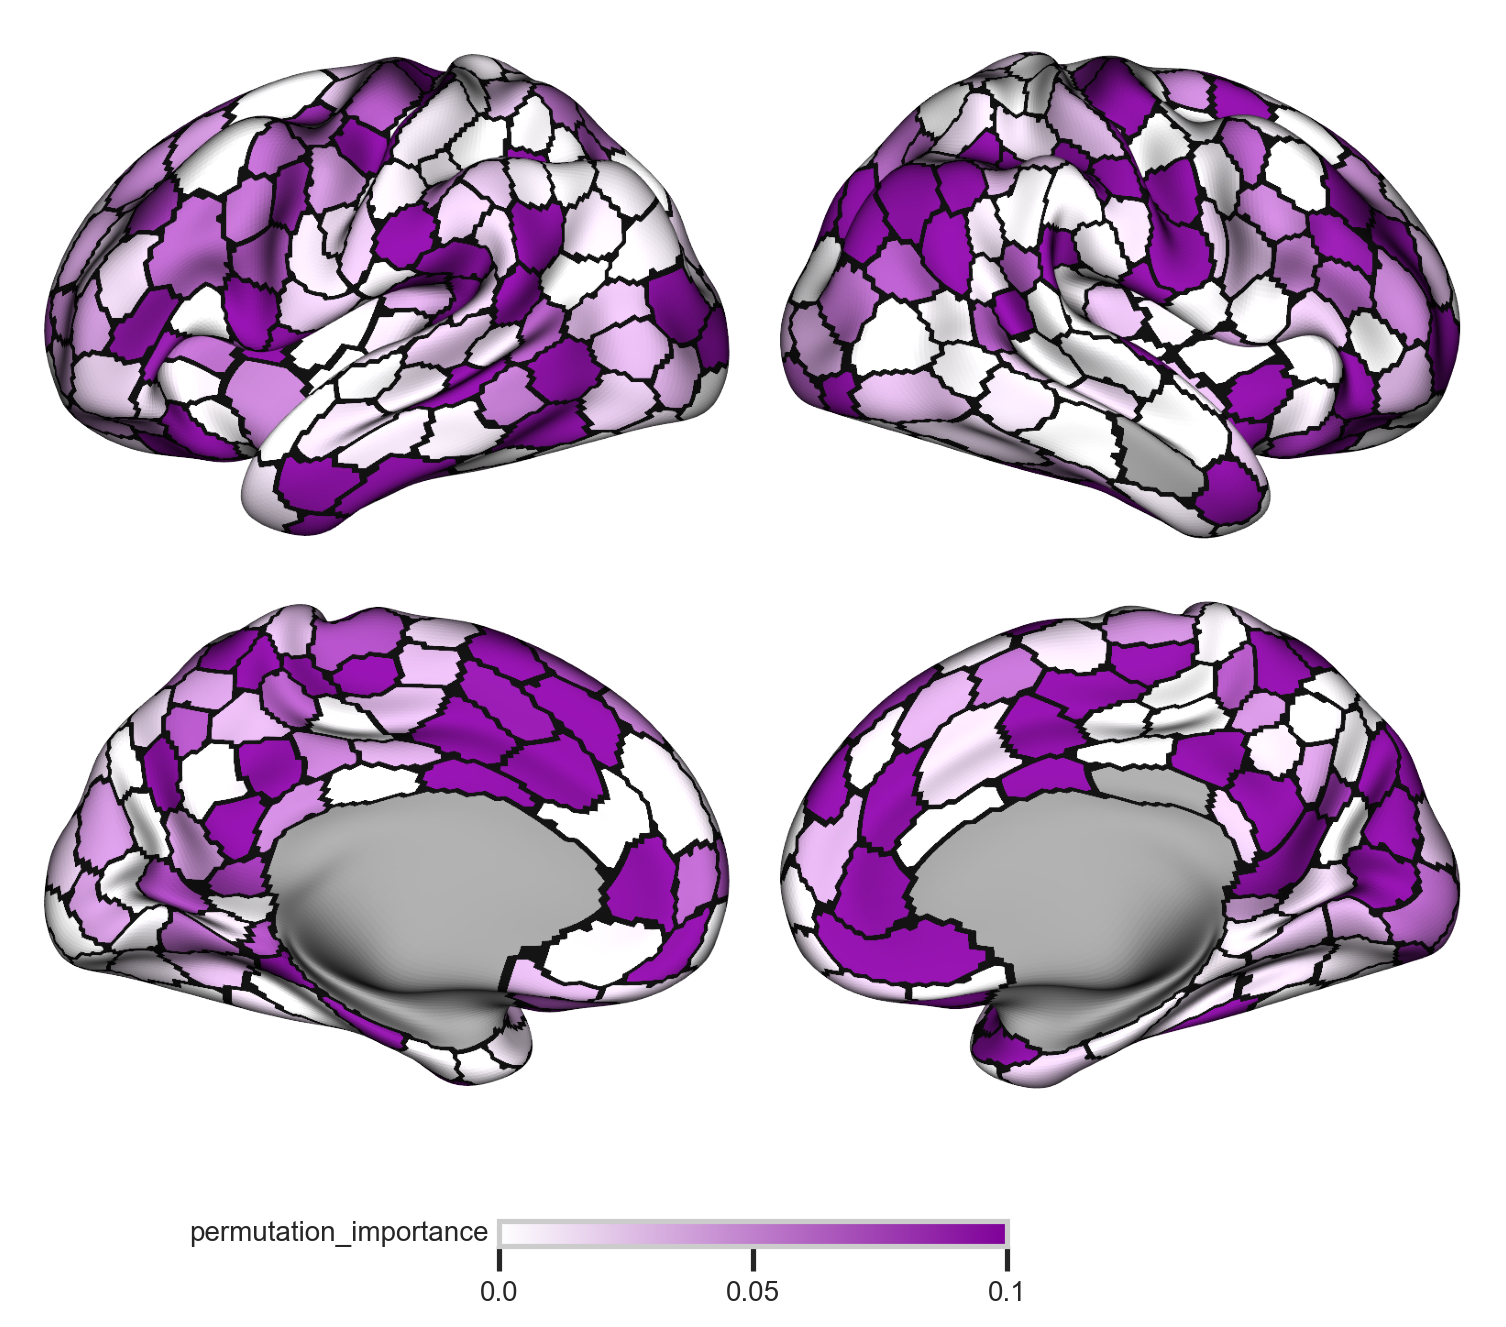

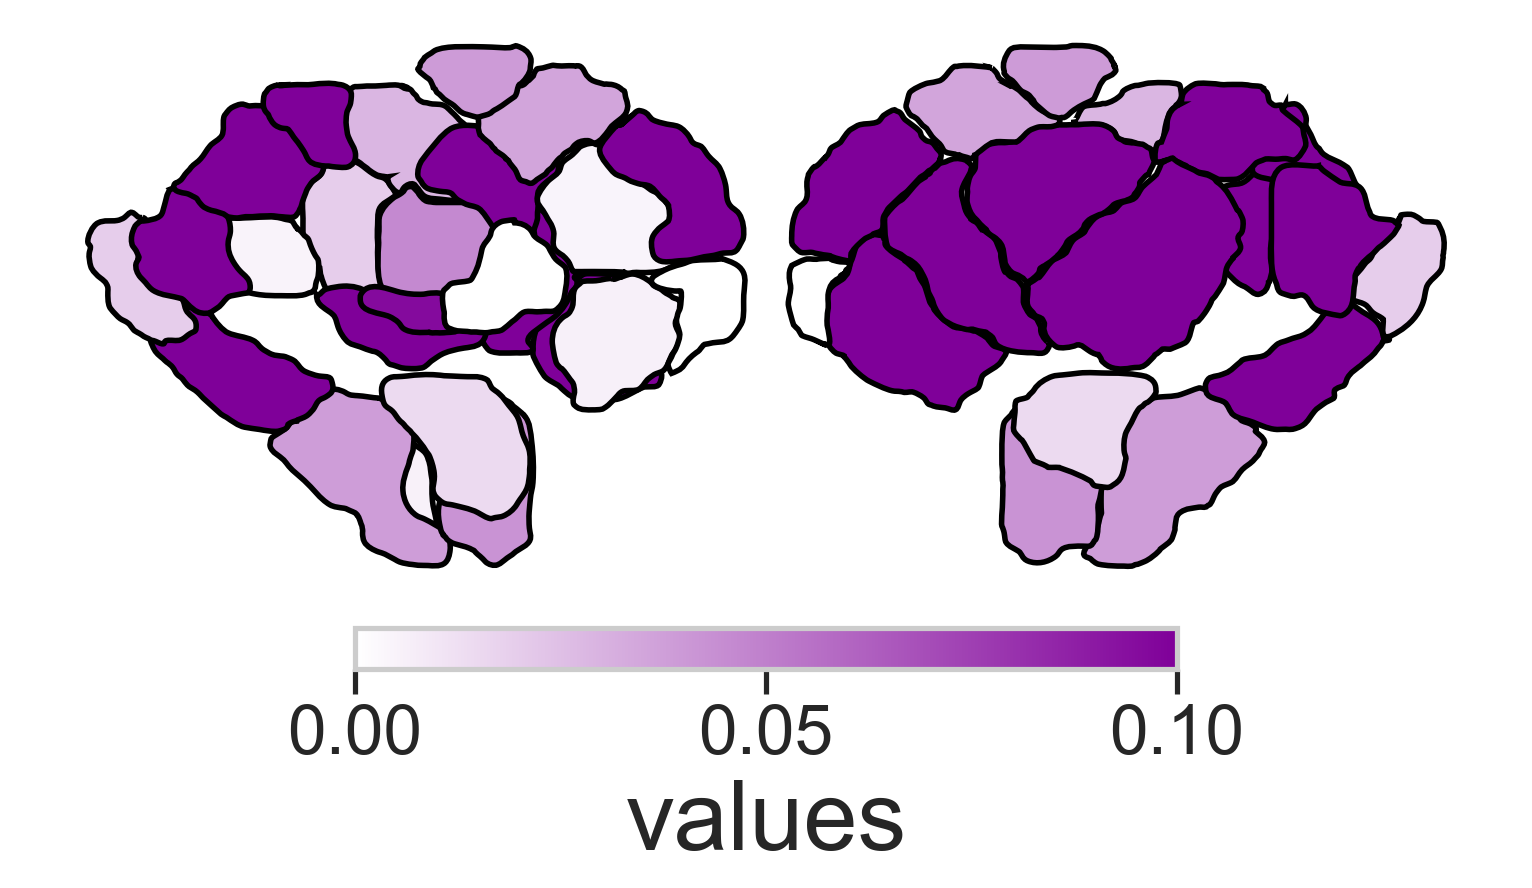

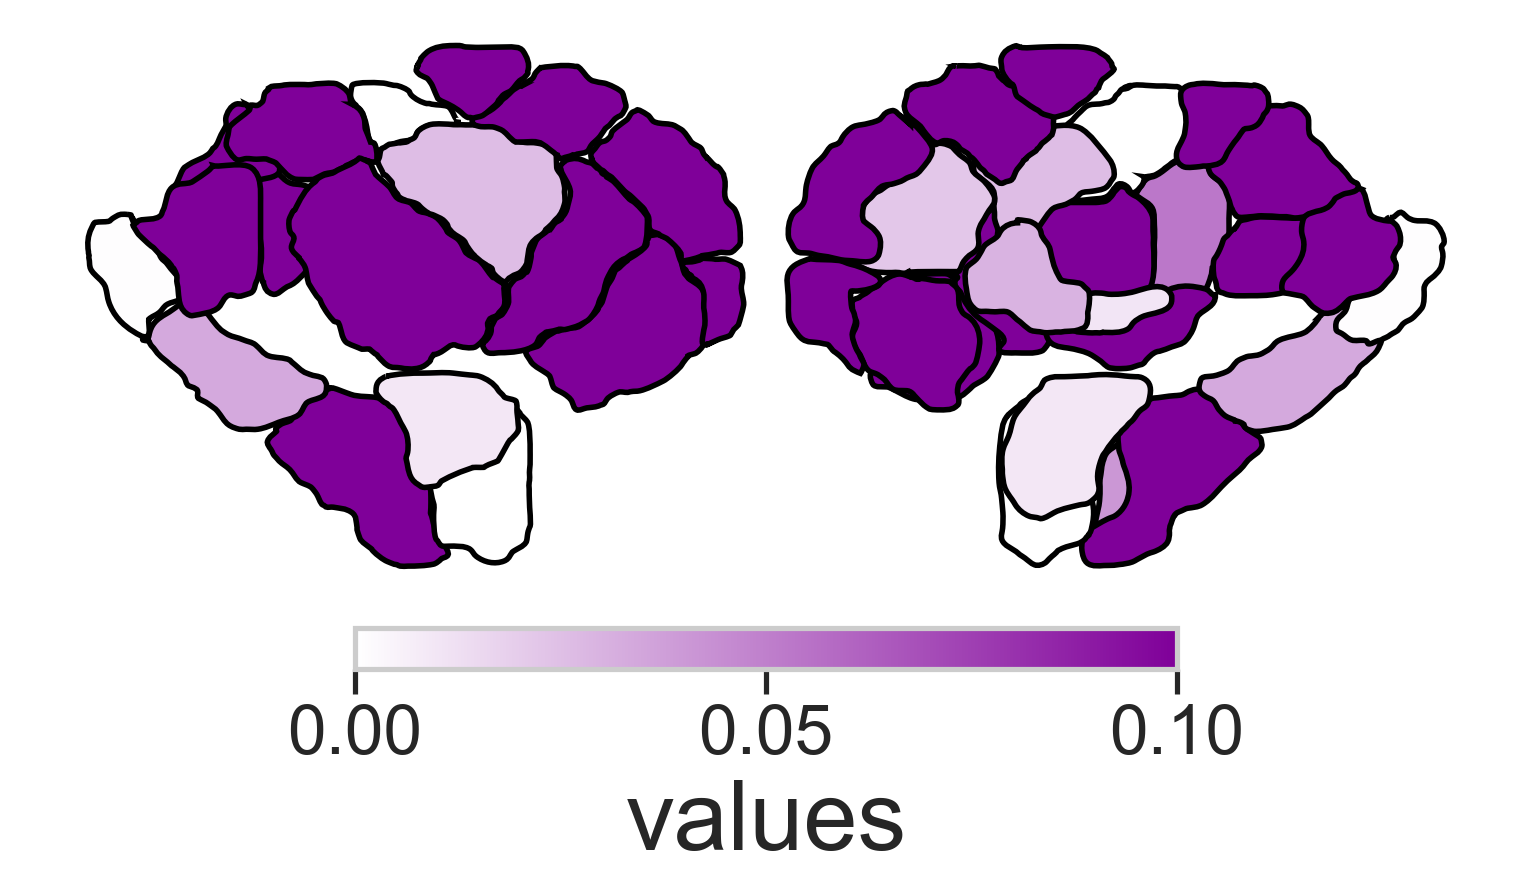

In [52]:
from subcortex_visualization.plotting import plot_subcortical_data

# ---------------------------------------------------------------------
# 4.  MAP REGION IDs → METRIC VALUES
#     vertices with label 0 (background) → NaN so they render transparent
# ---------------------------------------------------------------------
p_threshold = 0.05
# value_threshold = shap_imp["permutation_importance"].quantile(0.8)  # 95th percentile of absolute importance

value_threshold = 0

value_map = {}
value_map_subcortex = {"region": [], "value": [], "Hemisphere": []}

vmin = 0
# vmax = shap_imp["permutation_importance"].quantile(0.95)  # 95th percentile of absolute importance
vmax = 0.1  # 95th percentile of absolute importance
cmap = CMAP_WEIGHTED  # cmap for visualization

vis_df = shap_imp.copy()  # Use the stacked_models DataFrame

# vis_df = stats.copy()
# p_column = "p_val"
value_column = "permutation_importance"

value_map_lh = {}  # New: separate map for left hemisphere
value_map_rh = {}  # New: separate map for right hemisphere

for i, row in vis_df.iterrows():
    label = row[region_col]
    hemi_row = row["hemisphere"]  # Get hemisphere from your DataFrame row

    # Apply thresholds
    if np.abs(row[value_column]) >= value_threshold:
        value = row[value_column]
    else:
        value = np.nan  # Set to NaN if not significant or below value_threshold

    # Populate the correct hemisphere's value_map
    # Assuming your labels are global and you use the 'hemisphere' column to distinguish
    # If your Schaefer labels are already separated by hemi (e.g., 1-200 for LH, 201-400 for RH)
    # then you might only need to check the label range and not the 'hemisphere' column.
    # For Schaefer, the labels usually run 1-N for LH and N+1 - 2N for RH
    if "schaefer" in ATLAS:
        if label > int(ATLAS.split("_")[1]):
            value_map_subcortex["region"].append(label)
            value_map_subcortex["value"].append(value)
            value_map_subcortex["Hemisphere"].append(row["hemisphere"])
        else:
            if hemi_row == "L":
                value_map_lh[label] = value
            elif hemi_row == "R":
                value_map_rh[label] = value
        # Subcortex handling would go here if you were preparing for separate subcortical visualization
        # else: # This implies it's subcortical or other non-surface region
        #     value_map_subcortex["region"].append(label)
        #     value_map_subcortex["value"].append(value)
        #     value_map_subcortex["Hemisphere"].append(row["hemisphere"])

# Vectorize mapping for left and right hemispheres separately
vec_lh = np.vectorize(lambda x: value_map_lh.get(x, np.nan))
data_lh_mapped = vec_lh(lh_parc)  # Apply LH map to LH parcellation
vec_rh = np.vectorize(lambda x: value_map_rh.get(x, np.nan))
data_rh_mapped = vec_rh(rh_parc)  # Apply RH map to RH parcellation


p = Plot(
    lh,
    rh,
    # Unpack the surface dictionary
    # views=["medial", "lateral"],  # Show both medial and lateral for this hemi
    size=(800, 600),  # px; change as needed
    zoom=1.6,
    layout="grid",  # Horizontal layout for side-by-side views
    mirror_views=True,  # Set to False, as we are plotting one hemi at a time
)

# ---- main data layer -------------------------------------------------
# Pass only the data for the current hemisphere
# The dictionary now contains only one key-value pair for the current hemisphere
p.add_layer(
    {"left": data_lh_mapped, "right": data_rh_mapped},
    cmap=cmap,
    # cmap="coolwarm",
    #     # cmap="coolwarm",
    color_range=(vmin, vmax),  # Use symmetric range
    #     # norm=norm,  # Apply the symmetric normalization
    cbar_label=value_column,
    cbar=True,  # Ensure colorbar is shown for each plot if desired, or handle globally
)
# # ---- outline layer ---------------------------------------------------
p.add_layer({"left": lh_parc, "right": rh_parc}, cmap="gray", as_outline=True, cbar=False)

fig = p.build(
    # cbar_kws=dict(location="bottom", decimals=2, shrink=0.6)
)  # Added cbar_kws for better cbar display
# save figure
savefig_nice(
    fig,
    OUTPUT_DIR / "feature_importance.png",
    tight=True,
    dpi=400,
)


subcort_df = pd.DataFrame(value_map_subcortex)
if "schaefer" in ATLAS:
    subcort_df["region"] = subcort_df["region"] - int(ATLAS.split("_")[1])


for hemi in ["L", "R"]:

    fig = plot_subcortical_data(
        subcort_df,
        atlas="Melbourne_S3",
        show_legend=True,
        hemisphere=hemi,
        cmap=cmap,
        line_color="black",
        line_thickness=2,
        vmin=vmin,
        vmax=vmax,
        show_figure=False,
    )

    # save figure
    savefig_nice(
        fig,
        OUTPUT_DIR / f"feature_importance_subcort_{hemi}.png",
        tight=True,
        dpi=400,
    )
    # savefig_nice(fig, OUTPUT_DIR / f"fig2_subcort_{metric}_{hemi}_{value_column}.png", dpi=400)

In [53]:
predictions_df = pd.DataFrame()
for metric in predictions:
    if "base_stacked" in metric:
        for i, row in parcels.iterrows():
            cur_df = predictions[metric][i][["True", "Predicted"]].copy()
            cur_df = cur_df.rename(
                columns={"True": f"base_{i}_age", "Predicted": f"base_{i}_predicted"}
            )
            cur_df[f"base_{i}_BAG"] = cur_df[f"base_{i}_predicted"] - cur_df[f"base_{i}_age"]
            predictions_df = pd.concat([predictions_df, cur_df], axis=1)
        continue
    cur_df = (
        predictions[metric][["True", "Predicted"]]
        .copy()
        .rename(columns={"True": f"{metric}_age", "Predicted": f"{metric}_predicted"})
    )
    cur_df[f"{metric}_BAG"] = cur_df[f"{metric}_predicted"] - cur_df[f"{metric}_age"]
    predictions_df = pd.concat([predictions_df, cur_df], axis=1)


# w = predictions[best_metric]["weight"].to_numpy()


# # build a model to predict the residuals
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# import statsmodels.formula.api as smf

# # Fit a linear model to the residuals
# df["residuals"] = residuals
# model = ols("residuals ~ age", data=df).fit()
# # use the model to "fix" the predictions
# df["fixed_predicted"] = df["predicted"] + model.resi

KeyError: "None of [Index(['True', 'Predicted'], dtype='object')] are in the [index]"

In [ ]:
predictions_df.to_csv("BAG_data.csv")